In [1]:
library(tidyverse)
library(readxl)
library(DBI)

source("base/it-402-dc-common_vars.r")

── Attaching core tidyverse packages ────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ──────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:
## https://www.gov.scot/publications/independent-schools-in-scotland-register


### colleges
## https://www.audit-scotland.gov.uk/uploads/docs/report/2022/nr_220707_scotlands_colleges.pdf
## https://www.sfc.ac.uk/publications-statistics/statistical-publications/2023/SFCST012023.aspx_old

In [2]:
dbConn <- dbConnect(RSQLite::SQLite(), paste0(path_to_file_store, "/sqa-data-db.sqlite"))
dbConn

<SQLiteConnection>
  Path: /Users/aba-sah/OneDrive/work/programming/devt/r/work/sta/it-402-dc/sta_it_402/data/sqa-data-db.sqlite
  Extensions: TRUE

In [3]:
abbreviations <- c("St", abbreviations)
school_stopwords <- "^(The|St\\.?)\\b"


abbreviations

[1] "St"             "RC"             "FTE"            "CS"            
 [5] "ASN"            "ESL"            "SIMD"           "FSM"           
 [9] "P4-P7/S1-S6/SP" "SCQF"           "SQA"            "SVQ"           
[13] "NQGA"           "CBQ"

In [4]:
# interim

sqa_qualification_list_sqa_stat_data <- read_csv("sta_it_402/data/sqa_qualification_list_sqa_stat_data.csv") %>%
    mutate(across(SCQFLevel, as.integer), # , as.ordered - int safer, not 0 or 1-based
           across(TwoCode, as.factor),   
           
           across(IT402DBQualificationId, fct_inorder),
           across(matches("IT402DB|SFC|SQA"), ~ fct_reorder(., as.integer(IT402DBQualificationId))),
          ) %>%
    
    glimpse()

sqa_qualification_list_sqa_stat_data

Rows: 24 Columns: 8
── Column specification ──────────────────────────────────────────────────────────
Delimiter: ","
chr (7): IT402DBQualificationId, IT402DBQualificationTitle, IT402DBQualifica...
dbl (1): SCQFLevel

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 24
Columns: 8
$ IT402DBQualificationId      <fct> National2, National2, National3, National3…
$ IT402DBQualificationTitle   <fct> National 2, National 2, National 3, Nation…
$ IT402DBQualificationAcronym <fct> N2, N2, N3, N3, N4, N4, N5, N5, Higher, Hi…
$ SFCCollegeData              <fct> SQA National Award, SQA National Award, SQ…
$ SQAStatData                 <fct> N-HS, N-HS, N-HS, N-HS, N-HS, N-HS, N-HS, …
$ SQACatalogue                <fct> National Unit/Course, National Unit/Course…
$ TwoCode                     <fct> 72, 08, 73, 09, 74, 10, 75, 11, 76, 12, 76…
$ SCQFLevel                   <int> 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 6, 6, 7, 7, …


IT402DBQualificationId,IT402DBQualificationTitle,IT402DBQualificationAcronym,SFCCollegeData,SQAStatData,SQACatalogue,TwoCode,SCQFLevel
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>
National2,National 2,N2,SQA National Award,N-HS,National Unit/Course,72,2
National2,National 2,N2,SQA National Award,N-HS,National Unit/Course,08,2
National3,National 3,N3,SQA National Award,N-HS,National Unit/Course,73,3
National3,National 3,N3,SQA National Award,N-HS,National Unit/Course,09,3
National4,National 4,N4,SQA National Award,N-HS,National Unit/Course,74,4
National4,National 4,N4,SQA National Award,N-HS,National Unit/Course,10,4
National5,National 5,N5,SQA National Award,N-HS,National Unit/Course,75,5
National5,National 5,N5,SQA National Award,N-HS,National Unit/Course,11,5
Higher,Higher,Higher,SQA Higher Award,N-HS,National Unit/Course,76,6


In [5]:
path_to_file_store

paste(path_to_file_store, "demographic_data", sep = "/")


#"../sta_it_402/data/demographic_data/ paste(path_to_file_store, path_to_independent_schools, " 
path_to_independent_schools <- "/demographic_data/Register_of_Independent_Schools_" 
paste0(path_to_file_store, path_to_independent_schools)

[1] "sta_it_402/data"

[1] "sta_it_402/data/demographic_data"

[1] "sta_it_402/data/demographic_data/Register_of_Independent_Schools_"

### Colleges

In [ ]:
*** move out *** from centre_postcodes - check CentreType and uppercase conversion

datafiles_college_censuses <- paste(path_to_demographic_data, "SFC_College_Data.xlsx", sep = "/")

college_censuses <- read_xlsx(datafiles_college_censuses, trim_ws = TRUE, col_types = "text") %>% 
    filter(rowSums(is.na(.)) != ncol(.)) %>% 
    select(matches("name")) %>%
    rename_with(snakecase::to_upper_camel_case, abbreviations = abbreviations) %>%

    mutate(across(CollegeName, tools::toTitleCase),
           CentreType = "Further Education College") %>%
    distinct() 

college_censuses



centre_postcodes %>%
    filter(Centre %in% c("5632838")) %>%
    distinct(Centre, CentreName, CentreType, Address, Postcode)

#centre_postcodes %>%
#    filter(str_detect(CentreName, regex("virtual|support", ignore_case = TRUE)))


In [6]:
college_censuses <- read_xlsx("sta_it_402/data/demographic_data/SFC_College_Data.xlsx", trim_ws = TRUE, col_types = "text") %>% 
    filter(rowSums(is.na(.)) != ncol(.)) %>%
    glimpse()

Rows: 13,716
Columns: 9
$ `College Name`   <chr> "Argyll College", "Argyll College", "Argyll College",…
$ `College Region` <chr> "Highlands & Islands", "Highlands & Islands", "Highla…
$ Gender           <chr> "Male", "Male", "Male", "Male", "Male", "Male", "Male…
$ `SCQF Level`     <chr> "2", "2", "2", "2", "3", "3", "3", "3", "3", "3", "3"…
$ `Year of Study`  <chr> "1", "1", "1", "1", "1", "1", "1", "1", "1", "1", "1"…
$ `Academic Year`  <chr> "2018/19", "2019/20", "2019/20", "2021/22", "2017/18"…
$ `Entrant Status` <chr> "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes…
$ Qualification    <chr> "Programme not leading to recognised qualification (f…
$ Enrolments       <chr> "40", "5", "0", "5", "5", "110", "15", "125", "25", "…


In [7]:
unique(college_censuses$`Year of Study`)
unique(college_censuses$`College Name`)
unique(college_censuses$`College Region`)
unique(college_censuses$Qualification)

[1] "1" "2" "3" "4" "0" "5" "6"

[1] "Argyll College"                "Ayrshire College"             
 [3] "Borders College"               "City of Glasgow College"      
 [5] "Dumfries and Galloway College" "Dundee and Angus College"     
 [7] "Edinburgh College"             "Fife College"                 
 [9] "Forth Valley College"          "Glasgow Clyde College"        
[11] "Glasgow Kelvin College"        "Inverness College"            
[13] "Lews Castle College"           "Lews castle College"          
[15] "Moray College"                 "New College Lanarkshire"      
[17] "Newbattle Abbey College"       "North East Scotland College"  
[19] "North Highland College"        "Orkney College"               
[21] "Perth College"                 "SRUC"                         
[23] "Sabhal Mor Ostaig"             "Shetland College"             
[25] "South Lanarkshire College"     "West College Scotland"        
[27] "West Highland College"         "West Lothian College"

[1] "Highlands & Islands"        "Ayrshire"                  
 [3] "Borders"                    "Glasgow"                   
 [5] "Dumfries & Galloway"        "Tayside"                   
 [7] "Edinburgh"                  "Fife"                      
 [9] "Central"                    "Forth Valley"              
[11] "Lanarkshire"                "Newbattle"                 
[13] "Aberdeen and Aberdeenshire" "SRUC"                      
[15] "Sabhal Mor Ostaig"          "West"                      
[17] "West Lothian"

[1] "Programme not leading to recognised qualification (fully non-assessed\t\tcourses including most non-vocational programmes"                                                                           
 [2] "Non-advanced units but not leading to an award certificate (including infill)"                                                                                                                       
 [3] "SQA Skills for Work Award"                                                                                                                                                                           
 [4] "Non-advanced accredited qualification not specified elsewhere"                                                                                                                                       
 [5] "Non-advanced Scottish Vocational Qualification or National Vocational Qualification"                                                                                                                 
 [6] "SQA National Progression Award"                                                                                                                                                                      
 [7] "SQA National Award"                                                                                                                                                                                  
 [8] "National Certificate Award (accredited group award)"                                                                                                                                                 
 [9] "SQA Higher Award"                                                                                                                                                                                    
[10] "National Qualification Award (college devised program that will contain \t\taccredited units and may also contain small group award(s) but will not\t\tlead to a substantive accredited Group Award)"
[11] "Foundation Level Apprenticeship"                                                                                                                                                                     
[12] "Advanced Scottish Vocational Qualification or National Vocational Qualification"                                                                                                                     
[13] "SQA Advanced Higher Award"                                                                                                                                                                           
[14] "Advanced accredited qualification not specified elsewhere"                                                                                                                                           
[15] "Non-advanced SQA Professional Development Award"                                                                                                                                                     
[16] "Advanced SQA Professional Development Award"                                                                                                                                                         
[17] "Higher National Certificate or equivalent"                                                                                                                                                           
[18] "HN units only but not leading to an award certificate (including infill)"                                                                                                                            
[19] "Graduate Level Apprenticeship"                                                                                                                                                                       
[20] "Higher National Diploma or equivalent"                                                                                 

In [8]:
college_censuses %>%
    distinct(Qualification, `SCQF Level`)

Qualification,SCQF Level
<chr>,<chr>
Programme not leading to recognised qualification (fully non-assessed courses including most non-vocational programmes,2
Non-advanced units but not leading to an award certificate (including infill),2
SQA Skills for Work Award,3
Non-advanced accredited qualification not specified elsewhere,3
Non-advanced units but not leading to an award certificate (including infill),3
Programme not leading to recognised qualification (fully non-assessed courses including most non-vocational programmes,3
Non-advanced Scottish Vocational Qualification or National Vocational Qualification,4
SQA National Progression Award,4
SQA Skills for Work Award,4


In [11]:
college_censuses %>%
    filter(`College Region` %in% c("SRUC", "Sabhal Mor Ostaig", "West")) %>%
    distinct(`College Name`, `College Region`)

college_censuses %>%
    distinct(`College Name`, `College Region`) %>%
    arrange(`College Name`)

college_censuses %>%
    distinct(`Year of Study`, `Entrant Status`)

College Name,College Region
<chr>,<chr>
SRUC,SRUC
Sabhal Mor Ostaig,Sabhal Mor Ostaig
West College Scotland,West


College Name,College Region
<chr>,<chr>
Argyll College,Highlands & Islands
Ayrshire College,Ayrshire
Borders College,Borders
City of Glasgow College,Glasgow
Dumfries and Galloway College,Dumfries & Galloway
Dundee and Angus College,Tayside
Edinburgh College,Edinburgh
Fife College,Fife
Forth Valley College,Central


Year of Study,Entrant Status
<chr>,<chr>
1,Yes
2,No
3,No
4,No
0,Yes
5,No
6,No


In [12]:
college_censuses <- college_censuses %>%

    rename_with(~ snakecase::to_upper_camel_case(., abbreviations = abbreviations)) %>%
    rename(PupilRoll = Enrolments) %>%
    mutate(Year = gsub("\\d{4}\\/(\\d{2})", "20\\1", AcademicYear),
           across(YearOfStudy, ~ if_else((. == "0"), "1", .)),
           across(c(SCQFLevel, YearOfStudy, PupilRoll), as.integer),
           
           across(CollegeName, tools::toTitleCase),
          ) %>%
    relocate(Year, AcademicYear) %>%
    glimpse()

Rows: 13,716
Columns: 10
$ Year          <chr> "2019", "2020", "2020", "2022", "2018", "2018", "2018", …
$ AcademicYear  <chr> "2018/19", "2019/20", "2019/20", "2021/22", "2017/18", "…
$ CollegeName   <chr> "Argyll College", "Argyll College", "Argyll College", "A…
$ CollegeRegion <chr> "Highlands & Islands", "Highlands & Islands", "Highlands…
$ Gender        <chr> "Male", "Male", "Male", "Male", "Male", "Male", "Male", …
$ SCQFLevel     <int> 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,…
$ YearOfStudy   <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ EntrantStatus <chr> "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", …
$ Qualification <chr> "Programme not leading to recognised qualification (full…
$ PupilRoll     <int> 40, 5, 0, 5, 5, 110, 15, 125, 25, 20, 5, 190, 25, 195, 2…


In [13]:
college_censuses %>%
    distinct(Qualification, SCQFLevel) %>%
    rename(SCQFLevel = SCQFLevel) %>%

    left_join(sqa_qualification_list_sqa_stat_data %>%
                  filter(IT402DBQualificationId != "NewHigher") %>%
                  distinct(IT402DBQualificationId, SFCCollegeData, SCQFLevel, TwoCode), 
              by = c("Qualification" = "SFCCollegeData", "SCQFLevel")) %>%

    mutate(isSQAStatQualification = !is.na(IT402DBQualificationId)) %>%
    arrange(Qualification, SCQFLevel) %>%
    print(n = Inf)

# A tibble: 76 × 5
   Qualification SCQFLevel IT402DBQualificationId TwoCode isSQAStatQualification
   <chr>             <int> <fct>                  <fct>   <lgl>                 
 1 "Advanced SQ…         7 NA                     NA      FALSE                 
 2 "Advanced Sc…         5 NA                     NA      FALSE                 
 3 "Advanced Sc…         6 NA                     NA      FALSE                 
 4 "Advanced Sc…         7 NA                     NA      FALSE                 
 5 "Advanced ac…         7 NA                     NA      FALSE                 
 6 "First Degre…         7 NA                     NA      FALSE                 
 7 "Foundation …         4 NA                     NA      FALSE                 
 8 "Foundation …         5 NA                     NA      FALSE                 
 9 "Foundation …         6 NA                     NA      FALSE                 
10 "Graduate Le…         7 NA                     NA      FALSE                 
11 "HN un

In [ ]:
college_censuses %>%
    #glimpse()

    filter(YearOfStudy %in% c(0, 1)) %>%
    group_by(CollegeName, AcademicYear, Gender, SCQFLevel) %>% # YearOfStudy) %>%
    add_tally() %>%
    arrange(Year, CollegeName, Gender, SCQFLevel, YearOfStudy) %>%
    filter(n > 1)

In [ ]:
college_censuses <- college_censuses %>%

    group_by(across(!PupilRoll)) %>% # need to sum 0s and 1s
    summarise(across(PupilRoll, sum, na.rm = TRUE)) %>%

#group_by(CollegeName) %>%
#slice_sample(n = 3) %>%
    ungroup() %>%
#filter(CollegeName == "Argyll College") %>%

    left_join(sqa_qualification_list_sqa_stat_data %>%
                  filter(IT402DBQualificationId != "NewHigher") %>%
                  distinct(IT402DBQualificationId, IT402DBQualificationTitle, SFCCollegeData, SCQFLevel), 
              by = c("Qualification" = "SFCCollegeData", "SCQFLevel")) %>%

    mutate(isSQAStatQualification = !is.na(IT402DBQualificationId)) %>%


    group_by(across(!c(PupilRoll, Gender))) %>% 
    mutate(across(PupilRoll, sum, na.rm = TRUE, .names = "Gender_All")) %>%
    ungroup() %>%
    pivot_wider(names_from = Gender, names_prefix = "Gender_", values_from = PupilRoll) %>% 
    pivot_longer(matches("Gender_"), names_prefix = "Gender_", 
                 names_to = "Gender", values_to = "PupilRoll", values_drop_na = TRUE) %>%


    # SQA qualifications of interest
    group_by(CollegeName, AcademicYear, Gender, SCQFLevel, Qualification, isSQAStatQualification) %>% 
    mutate(across(PupilRoll, sum, na.rm = TRUE, .names = "{.col}_Qualification")) %>%
    
    group_by(CollegeName, AcademicYear, Gender, Qualification, isSQAStatQualification) %>% 
    mutate(across(PupilRoll, sum, na.rm = TRUE, .names = "{.col}_QualificationGroup")) %>%
    
    group_by(CollegeName, AcademicYear, Gender, SCQFLevel, isSQAStatQualification) %>% 
    mutate(across(PupilRoll, sum, na.rm = TRUE, .names = "{.col}_SCQFLevel")) %>%

    # all qualifications
# should be unique - value same as above
#    group_by(CollegeName, AcademicYear, Gender, SCQFLevel, Qualification) %>% 
#    mutate(across(PupilRoll, sum, na.rm = TRUE, .names = "{.col}_Qualification_College")) %>%
    
    group_by(CollegeName, AcademicYear, Gender, Qualification) %>% 
    mutate(across(PupilRoll, sum, na.rm = TRUE, .names = "{.col}_QualificationGroup_College")) %>%
    
    group_by(CollegeName, AcademicYear, Gender, SCQFLevel) %>% 
    mutate(across(PupilRoll, sum, na.rm = TRUE, .names = "{.col}_SCQFLevel_College")) %>%
    ungroup() %>%

#filter(PupilRoll_QualificationGroup != PupilRoll_QualificationGroup_College) %>%
    #filter(!isSQAStatQualification & (Qualification %in% sqa_qualification_list_sqa_stat_data$SFCCollegeData)) %>%
    #select(AcademicYear, CollegeName, Qualification, SCQFLevel) %>%
    #distinct() %>%
    #write_csv("sfc_qualifcation_scql_level_mismatch.csv")

#    filter(isSQAStatQualification) %>%
    mutate(across(isSQAStatQualification, ~ case_when((!isSQAStatQualification & (Qualification %in% sqa_qualification_list_sqa_stat_data$SFCCollegeData)) 
                                                          ~ "SQAStat Qualification-SCQFLevel mismatch",
                                                      TRUE ~ if_else(., "SQAStat Qualification", "Other Qualification")
                                                      )),
           ) %>%
    relocate(Gender, .before = SCQFLevel) %>%
    arrange(Year, CollegeName, Gender, SCQFLevel, YearOfStudy) %>%
    glimpse()


college_censuses %>%
    filter(isSQAStatQualification != "Other Qualification") %>%
    group_by(CollegeName) %>%
    slice_sample(n = 3) %>%
    ungroup() 

In [ ]:
postcode_lookup <- dbGetQuery(dbConn, "SELECT * FROM centre_postcodes") %>%
    mutate(across(CentreName, tools::toTitleCase),
          ) %>%
    glimpse()

In [ ]:
college_censuses %>%
    distinct(CollegeName, CollegeRegion) %>%

    left_join(postcode_lookup %>%
                  select(Centre, CentreName, Postcode, GeoArea) %>%
                  rename(LocalAuthority = GeoArea),
              by = c("CollegeName" = "CentreName"),
             ) %>%
    relocate(LocalAuthority, .after = Postcode) %>%
    relocate(Centre, .before = CollegeName) %>%
    arrange(CollegeName) %>%

    filter(is.na(Centre))


college_censuses %>%
    distinct(CollegeName, CollegeRegion) %>%

    left_join(postcode_lookup %>%
                  select(Centre, CentreName),
              by = c("CollegeName" = "CentreName"),
             ) %>%
    relocate(Centre, .before = CollegeName) %>%
    arrange(CollegeName) %>%

    filter(is.na(Centre)) %>%

    mutate(across(Centre, ~ case_when(is.na(.) ~
                                          case_when((CollegeName == "Inverness College") ~ "5160553",
                                                    #(CollegeName == "Sabhal Mor Ostaig") ~ "",
                                                    (CollegeName == "Shetland College") ~ "6103650",
                                                    (CollegeName == "SRUC") ~ "1003259", # several campses - defaulting here ONLY to SRUC Scotland's Rural College
                                                    (CollegeName == "West Highland College") ~ "3004325",
                                                    ),
                                      TRUE ~ .
                                     )),
          ) %>%

    left_join(postcode_lookup %>%
                  select(Centre, Postcode, GeoArea) %>%
                  rename(LocalAuthority = GeoArea),
             ) %>%

    relocate(LocalAuthority, .after = Postcode)

In [ ]:
postcode_lookup %>%
    filter(str_detect(CentreName, regex("SRUC|rural|Inverness|Dumfries|Glasgow|Sabhal|Shetland|Highland", ignore_case = TRUE))) %>%
    arrange(GeoArea) %>%
    distinct(Centre, CentreName, Postcode, EducationAuthority, GeoArea, Country)

In [ ]:
gender_options

#### ISO/IEC 5218 gender codes: 

* 0 = Not known
* 1 = Male
* 2 = Female
* 9 = Not applicable


https://www.iso.org/standard/81682.html

https://www.iso.org/obp/ui/#iso:std:iso-iec:5218:ed-2:v1:en

In [ ]:
unique(college_censuses$Gender)

gender_options_iso 

In [ ]:
*** interim manual


dim(college_censuses)

college_censuses <- college_censuses %>%

    left_join(postcode_lookup %>%
                  select(Centre, CentreName, Postcode, GeoArea) %>%
                  rename(LocalAuthority = GeoArea),
              by = c("CollegeName" = "CentreName"),
             ) %>%
    relocate(Postcode, LocalAuthority, .before = CollegeRegion) %>%
    relocate(Centre, .before = CollegeName) %>%

    mutate(across(Centre, ~ case_when(is.na(.) ~
                                          case_when((CollegeName == "Inverness College") ~ "5160553",
                                                    #(CollegeName == "Sabhal Mor Ostaig") ~ "",
                                                    (CollegeName == "Shetland College") ~ "6103650",
                                                    (CollegeName == "SRUC") ~ "1003259", # several campses - defaulting here ONLY to SRUC Scotland's Rural College
                                                    (CollegeName == "West Highland College") ~ "3004325",
                                                    ),
                                      TRUE ~ .
                                     )),
           across(Postcode, ~ case_when(is.na(.) ~
                                          case_when((CollegeName == "Inverness College") ~ "IV2 5NA",
                                                    #(CollegeName == "Sabhal Mor Ostaig") ~ "",
                                                    (CollegeName == "Shetland College") ~ "ZE1 0PX",
                                                    (CollegeName == "SRUC") ~ "EH52 6NH", 
                                                    (CollegeName == "West Highland College") ~ "PH33 6FF",
                                                    ),
                                      TRUE ~ .
                                     )),
           across(LocalAuthority, ~ case_when(is.na(.) ~
                                          case_when((CollegeName == "Inverness College") ~ "Highland",
                                                    #(CollegeName == "Sabhal Mor Ostaig") ~ "",
                                                    (CollegeName == "Shetland College") ~ "Shetland Islands",
                                                    (CollegeName == "SRUC") ~ "West Lothian", 
                                                    (CollegeName == "West Highland College") ~ "Highland",
                                                    ),
                                      TRUE ~ .
                                     )),
          ) %>%

    mutate(across(Gender, ~ case_when(str_detect(., regex("All", ignore_case = TRUE)) ~ NA_character_,
                                      str_detect(., regex("Female", ignore_case = TRUE)) ~ "2",
                                      str_detect(., regex("Male", ignore_case = TRUE)) ~ "1",
                                      str_detect(., regex("(Not applicable)|(N/A)", ignore_case = TRUE)) ~ "9",
                                      TRUE ~ "0"
                                     ), .names = "GenderISOCode"),
           across(Gender, ~ gender_options_iso[GenderISOCode], .names = "GenderISOLabel"),
           across(Centre)
          ) %>%
    relocate(matches("Gender\\w+$"), .after = Gender) %>%

    write_csv("sta_it_402/data/college_censuses.csv", na = "") %>%
    glimpse()



college_censuses %>%
    distinct(Centre, CollegeName, CollegeRegion, Postcode, LocalAuthority)

college_censuses %>%
    distinct(across(matches("Gender")))

In [ ]:
college_censuses %>%
    distinct(CollegeName)

In [ ]:
c(abbreviations, "[[:punct:]]")

In [ ]:
test_list <- c("Lews Castle College", "Lews castle College", "Moray-College", "North Highland's College", 
               "College of Orkney", "Perth College2", "SRUC", "SRUC College", "SRUC ColLEGE", "SRUC COLlege", 
               "RUCC", "Dumfries And Galloway College", "Dundee & Angus College", "Dundee under Angus", 
               "Dundee Under Angus", "SRUC college")

test_list %>%
    snakecase::to_title_case(., abbreviations = c(abbreviations, "[[:punct:]-]")) #sep_in = 
#, "'", "[]")) #  ' # S % & ' ( ) * + , - /

test_list %>%
    str_to_title(.)


test_list %>%
    tools::toTitleCase(.)

rm(test_list)

### Independent Secondary Schools

In [ ]:
list.files(paste(path_to_file_store, "demographic_data", sep = "/"), pattern = "Register_of_Independent_Schools", full.names = T, ignore.case = T)


In [ ]:
path_to_independent_schools <- "/demographic_data/Register_of_Independent_Schools_" 

datafiles_independent_secondary_school_level_summary_statistics <-
    c("2019" = paste0(path_to_file_store, path_to_independent_schools, "Jun_2019.xlsx"), # "Jun"
      "2020" = paste0(path_to_file_store, path_to_independent_schools, "Jan_2020.xlsx"), # "Jan"
      "2021" = paste0(path_to_file_store, path_to_independent_schools, "Jun_2021.xlsx"), # "Jun"
      "2022" = paste0(path_to_file_store, path_to_independent_schools, "Jul_2022.xlsx"), # "Jul"
      "2023" = paste0(path_to_file_store, path_to_independent_schools, "Apr_2023.xlsx")  # "Apr"
      )

#datafiles_independent_secondary_school_level_summary_statistics <- 
#    datafiles_independent_secondary_school_level_summary_statistics[!str_detect(datafiles_independent_secondary_school_level_summary_statistics, "\\~")] 

datafiles_independent_secondary_school_level_summary_statistics_census_month <-
    c("2019" = "Jun",
      "2020" = "Jan",
      "2021" = "Jun",
      "2022" = "Jul",
      "2023" = "Apr"
      )
                      
rm(path_to_independent_schools)                    

In [ ]:
*** back out of cenre_postcodes - lookup cleaninag - can't feed in w/o the SeedCodes so need to run the text matching here

In [ ]:
*** move out ***

independent_schools_register <- data.frame()
independent_schools_register

for (census_year in names(datafiles_independent_secondary_school_level_summary_statistics)) {
    independent_schools_register <- independent_schools_register %>% 
        bind_rows(read_xlsx(datafiles_independent_secondary_school_level_summary_statistics[census_year], 
                             trim_ws = TRUE, col_types = "text"
                            ) %>% 
                    filter(rowSums(is.na(.)) != ncol(.)) %>% 
                    select(matches("name|type|address|post|year|primary|second|ASN") & !matches("email")) %>%
                    rename_with(snakecase::to_upper_camel_case, abbreviations = abbreviations) %>%
                    rename_with(~ c("SchoolName", "CentreType"), 
                                    c("NameOfSchool", "PrimarySecondayEducation")) %>%
    
                    mutate(across(where(is.character), str_squish),
                           across(SchoolName, tools::toTitleCase),
                           across(Address, ~ if_else(!str_detect(., "(\\b[[:alnum:]]{2,4}\\s[[:alnum:]]{2,4}$)"), NA_character_,
                                      gsub("^[[:alnum:][:punct:][:blank:]]*(\\b[[:alnum:]]{2,4}\\s[[:alnum:]]{2,4}$)", 
                                   "\\U\\1", ., perl = TRUE)), .names = "Postcode"),
                           across(Address, ~ str_squish(str_remove(., Postcode))), # no delimiters - spaces, word wrap and column width set up to simulate carrige returns
                           across(ASN, ~ case_when(str_detect(., "TRUE") ~ TRUE,
                                                   str_detect(., "^FALS") ~ FALSE,
                                                   TRUE ~ as.logical(NA)
                                                  )),
                           CentreStatus = "Independent",
                           Year = census_year,
                           Month = datafiles_independent_secondary_school_level_summary_statistics_census_month[census_year]
                          )  %>%
                    relocate(CentreStatus, CentreType, ASN, .after = Address) %>%
                    relocate(Year, Month)%>%
                    relocate(Address, Postcode, .after = last_col())
                 )
}

glimpse(independent_schools_register)

--- split cell ---


unique(independent_schools_register$CentreType)
unique(independent_schools_register$ASN)


--- split cell ---


independent_schools_register %>%
    slice_sample(n = 4)


--- split cell ---


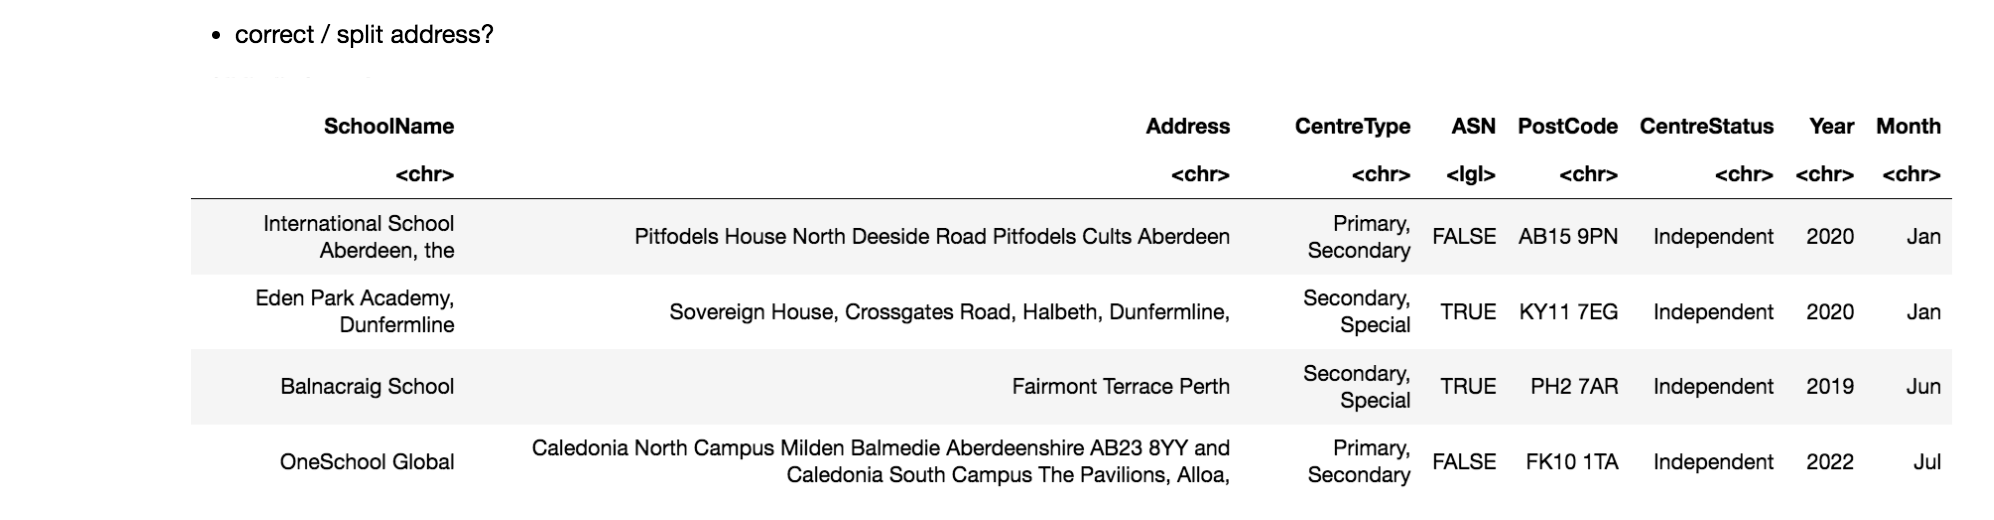

In [ ]:
independent_schools_register %>%
    mutate(across(CentreType, tools::toTitleCase),
           across(CentreType, ~ fct_relabel(., ~ gsub("\\s*-\\s*", "-", .))),
           across(CentreType, ~ fct_relabel(., ~ gsub("(^Age specific)(\\s*)(\\d)", "\\1: \\3", ., ignore.case = TRUE))),
           across(CentreType, ~ fct_relabel(., ~ gsub("(^All)(\\s|-)(through)", "\\1-\\3", ., ignore.case = TRUE))),

           across(CentreType, ~ fct_recode(., 
                                            P1_S2 = "Primary and S1/S2",
                                            P1_S3 = "Primary and S1-S3",
                                            P1_S4 = "Age Specific: 5-14",
                                            P2_S6 = "Age Specific: 6-18",
                                            P3_S6 = "Age Specific: 7-18",
                                            P3_S3 = "Age Specific: P4-S3",
                                            P4_S6 = "Age Specific: 8-18",
                                            P5_S6 = "Age Specific: 9-18",
                                            P6_S6 = "Age Specific: 10-18",
                                            P7_S6 = "Age Specific: 11-18",
                                            P1_S6 = "All-Through",
                                            P6_S6 = "Primary 6, 7 and Secondary",
                                            S4_S6 = "Age Specific: 14-18",
                                            S1_S6 = "Secondary",
                                          )),
           
        
           #across(CentreType, as.character),
           test = as.character(CentreType),
           across(test, ~ case_when(str_detect(., "^S\\d_") & ASN ~ "Secondary, Special",
                                     str_detect(., "^S\\d_") ~ "Secondary",
                                     str_detect(., "^P\\d_S\\d$") & ASN ~ "Special",
                                     str_detect(., "^P\\d_S\\d$") ~ "Primary, Secondary",
                                     ASN ~ paste(., "Special", sep = ", "),
                                     TRUE ~ .
                                    )),
           across(test, ~ case_when(str_detect(., "Secondary") ~ TRUE,
                                    str_detect(., "Special") & !str_detect(., "Primary") ~ TRUE,
                                          TRUE ~ FALSE
                                         ), .names = "CentreTypeFilter"),
          ) %>%
    count(test, across(matches("CentreType")), ASN)

independent_schools_register %>%
    mutate(across(CentreType, tools::toTitleCase),
           across(CentreType, ~ fct_relabel(., ~ gsub("\\s*-\\s*", "-", .))),
           across(CentreType, ~ fct_relabel(., ~ gsub("(^Age specific)(\\s*)(\\d)", "\\1: \\3", ., ignore.case = TRUE))),
           across(CentreType, ~ fct_relabel(., ~ gsub("(^All)(\\s|-)(through)", "\\1-\\3", ., ignore.case = TRUE))),

           across(CentreType, ~ fct_recode(., 
                                            P1_S2 = "Primary and S1/S2",
                                            P1_S3 = "Primary and S1-S3",
                                            P1_S4 = "Age Specific: 5-14",
                                            P2_S6 = "Age Specific: 6-18",
                                            P3_S6 = "Age Specific: 7-18",
                                            P3_S3 = "Age Specific: P4-S3",
                                            P4_S6 = "Age Specific: 8-18",
                                            P5_S6 = "Age Specific: 9-18",
                                            P6_S6 = "Age Specific: 10-18",
                                            P7_S6 = "Age Specific: 11-18",
                                            P1_S6 = "All-Through",
                                            P6_S6 = "Primary 6, 7 and Secondary",
                                            S4_S6 = "Age Specific: 14-18",
                                            S1_S6 = "Secondary",
                                          )),
           
        
           #across(CentreType, as.character),
           test = as.character(CentreType),
           across(test, ~ case_when(str_detect(., "^S\\d_") & ASN ~ "Secondary, Special",
                                     str_detect(., "^S\\d_") ~ "Secondary",
                                     str_detect(., "^P\\d_S\\d$") & ASN ~ "Special",
                                     str_detect(., "^P\\d_S\\d$") ~ "Primary, Secondary",
                                     ASN ~ paste(., "Special", sep = ", "),
                                     TRUE ~ .
                                    )),
           across(test, ~ case_when(str_detect(., "Secondary") ~ TRUE,
                                    str_detect(., "Special") & !str_detect(., "Primary") ~ TRUE,
                                          TRUE ~ FALSE
                                         ), .names = "CentreTypeFilter"),
          ) %>%
    count(test, across(matches("CentreType")), ASN) %>%

    filter(CentreTypeFilter) %>%
    select(- CentreTypeFilter)


--- split cell ---


dim(independent_schools_register)

independent_schools_register <- independent_schools_register %>%
    mutate(across(CentreType, tools::toTitleCase),
           across(CentreType, ~ fct_relabel(., ~ gsub("\\s*-\\s*", "-", .))),
           across(CentreType, ~ fct_relabel(., ~ gsub("(^Age specific)(\\s*)(\\d)", "\\1: \\3", ., ignore.case = TRUE))),
           across(CentreType, ~ fct_relabel(., ~ gsub("(^All)(\\s|-)(through)", "\\1-\\3", ., ignore.case = TRUE))),

           across(CentreType, ~ fct_recode(., 
                                            P1_S2 = "Primary and S1/S2",
                                            P1_S3 = "Primary and S1-S3",
                                            P1_S4 = "Age Specific: 5-14",
                                            P2_S6 = "Age Specific: 6-18",
                                            P3_S6 = "Age Specific: 7-18",
                                            P3_S3 = "Age Specific: P4-S3",
                                            P4_S6 = "Age Specific: 8-18",
                                            P5_S6 = "Age Specific: 9-18",
                                            P6_S6 = "Age Specific: 10-18",
                                            P7_S6 = "Age Specific: 11-18",
                                            P1_S6 = "All-Through",
                                            P6_S6 = "Primary 6, 7 and Secondary",
                                            S4_S6 = "Age Specific: 14-18",
                                            S1_S6 = "Secondary",
                                          ))
          ) %>%
    mutate(across(CentreType, as.character),
           across(CentreType, ~ case_when(str_detect(., "^S\\d_") & ASN ~ "Secondary, Special",
                                             str_detect(., "^S\\d_") ~ "Secondary",
                                             str_detect(., "^P\\d_S\\d$") & ASN ~ "Special",
                                             str_detect(., "^P\\d_S\\d$") ~ "Primary, Secondary",
                                             ASN ~ paste(., "Special", sep = ", "),
                                             TRUE ~ .
                                            )),
           across(CentreType, ~ case_when(str_detect(., "Secondary") ~ TRUE,
                                          str_detect(., "Special") & !str_detect(., "Primary") ~ TRUE,
                                          TRUE ~ FALSE
                                         ), .names = "CentreTypeFilter"),
           across(CentreType, as.factor),
           
           across(Postcode, ~ case_when((SchoolName == "OneSchool Global") ~ paste("AB23 8YY", ., sep = "; "),
                                        TRUE ~ .
                                       )),
           Flag = if_else((SchoolName == "OneSchool Global"), 
                          "North and South campuses reported in independent schools register as single school",
                          NA_character_
                         ),
       ) %>%

    filter(CentreTypeFilter) %>%
    select(- CentreTypeFilter) %>%
    
    glimpse()


--- split cell ---


independent_schools_register %>%
    filter(str_detect(SchoolName, "Netherlea"))


independent_schools_register %>%
    filter(str_detect(SchoolName, "Focus|Springvale|Oakwood|Oneschool|Global|Ochil") | str_detect(Address, "Focus|Springvale"))


#independent_schools_register %>%
#    filter(str_detect(SchoolName, regex("virtual|support", ignore_case = TRUE)))
*** END - *** move out ***

In [ ]:
***

In [ ]:
independent_schools_register <- data.frame()
independent_schools_register

for (census_year in names(datafiles_independent_secondary_school_level_summary_statistics)) {
    independent_schools_register <- independent_schools_register %>% 
        bind_rows(read_xlsx(datafiles_independent_secondary_school_level_summary_statistics[census_year], 
                             trim_ws = TRUE, col_types = "text"
                            ) %>% 
                    filter(rowSums(is.na(.)) != ncol(.)) %>% 
                    mutate(Year = census_year,
                           Month = datafiles_independent_secondary_school_level_summary_statistics_census_month[census_year])
                 )
}

glimpse(independent_schools_register)

independent_schools_register %>%
    group_by(Year) %>%
    slice_sample(n = 2)

In [ ]:
unique(independent_schools_register$`Primary / Seconday education`)

In [ ]:
independent_schools_register %>% 
    rename_with(~ snakecase::to_upper_camel_case(., abbreviations = abbreviations)) %>%
    select(matches("^(name|address|primary)")) %>%
    rename_with(~ c("SchoolName", "Postcode", "SchoolType")) %>%
    mutate(across(Postcode, ~ if_else(!str_detect(., "(\\b[[:alnum:]]{2,4}\\s[[:alnum:]]{2,4}$)"), NA_character_,
                                      gsub("^[[:alnum:][:punct:][:blank:]]*(\\b[[:alnum:]]{2,4}\\s[[:alnum:]]{2,4}$)", 
                                   "\\U\\1", ., perl = TRUE))),
           EducationAuthority = "Independent"
          ) %>%
    #glimpse()
    distinct(Postcode) %>%
    as_tibble() %>%
    print(n = Inf)

In [ ]:
independent_schools_register <- independent_schools_register %>%
    
#slice_sample(n = 15) %>%
    rename_with(~ snakecase::to_upper_camel_case(., abbreviations = abbreviations)) %>%
    filter((str_starts(PrimarySecondayEducation, "Age specific") & str_detect(PrimarySecondayEducation, "((S[4-6])|(1[4-8]))$")) |
           str_detect(PrimarySecondayEducation, regex("secondary|all through", ignore_case = TRUE))
          ) %>%
    select(Year, Month, NameOfSchool, Address, ASN, MaximumRoll, PrimarySecondayEducation, DenominationalSchool) %>%
    rename_with(~ c("SchoolName", "ASNCentre", "PupilRoll", "PrimarySecondaryEducation", "DenominationOfSchool"),  
                c("NameOfSchool", "ASN", "MaximumRoll", "PrimarySecondayEducation", "DenominationalSchool")) %>%

    mutate(across(where(is.character), ~ str_squish(.)),
           across(Year, as.ordered),
           across(SchoolName, tools::toTitleCase),
           across(DenominationOfSchool, ~ if_else(. == "Yes", "UnspecifiedDenomination", "Non-denominational")),
           across(PupilRoll, as.integer),
           across(ASNCentre, as.logical),
           across(DenominationOfSchool, as.factor),
           
           Postcode = if_else(!str_detect(Address, "(\\b[[:alnum:]]{2,4}\\s[[:alnum:]]{2,4}$)"), NA_character_,
                              gsub("^[[:alnum:][:punct:][:blank:]]*(\\b[[:alnum:]]{2,4}\\s[[:alnum:]]{2,4}$)", 
                                   "\\U\\1", Address, perl = TRUE)),
           across(Address, ~ str_remove(., Postcode)), 
           across(Address, ~ gsub("([[:punct:][:space:]]*)$", "", .)), # for the small number using delimiters ...
           EducationAuthority = "Independent"
          ) %>%
    arrange(SchoolName, desc(Year)) %>%
    relocate(Postcode, .after = Address) %>%
    glimpse()


independent_schools_register %>%
    group_by(PrimarySecondaryEducation) %>%
    slice_sample(n = 2) %>%
    t()

independent_schools_register %>%
    distinct(PrimarySecondaryEducation)

independent_schools_register %>%
    filter(is.na(as.integer(PupilRoll)))

In [ ]:

independent_schools_register %>%
    filter(is.na(PupilRoll)) %>%
    distinct(SchoolName) %>%

    left_join(independent_schools_register %>% 
                 select(SchoolName, Year, ASNCentre, PupilRoll, PrimarySecondaryEducation)
             )

In [ ]:
independent_schools_register %>%
    #filter(SchoolName == "OneSchool Global") %>%
    mutate(across(Postcode, ~ case_when((SchoolName == "OneSchool Global") ~ paste("AB23 8YY", ., sep = "; "),
                                        TRUE ~ .
                                       )),
           Flag = if_else((SchoolName == "OneSchool Global"), 
                          "North and South campuses reported in independent schools register as single school",
                          NA_character_
                         ),
          ) %>%

    count(across(matches("Flag")))

independent_schools_register <- independent_schools_register %>%
    mutate(across(Postcode, ~ case_when((SchoolName == "OneSchool Global") ~ paste("AB23 8YY", ., sep = "; "),
                                        TRUE ~ .
                                       )),
           Flag = if_else((SchoolName == "OneSchool Global"), 
                          "North and South campuses reported in independent schools register as single school",
                          NA_character_
                         ),
          )

In [ ]:
independent_schools_register %>%
    filter(is.na(PupilRoll)) %>%
    distinct(SchoolName) %>%

    left_join(independent_schools_register %>% 
                 select(SchoolName, Year, ASNCentre, PupilRoll, PrimarySecondaryEducation)
             ) %>%

    mutate(across(PupilRoll, ~  if_else(!is.na(.), NA_character_, "Not set"), .names = "PupilRollFlag"),
           across(PupilRoll, ~ case_when(!is.na(.) ~ .,
                                         TRUE ~
                                             case_when((SchoolName == "OneSchool Global") ~ as.integer(180),
                                                       (SchoolName == "Gordonstoun School") ~ as.integer(657),
                                                       #(SchoolName == "") ~ ,
                                                      )
                                        )),
           across(PupilRollFlag, ~  if_else(!is.na(.) & !is.na(PupilRoll), "Manually set", .)),
          ) %>%
    relocate(PupilRollFlag, .after = PupilRoll)

In [ ]:
independent_schools_register %>%
    mutate(across(PrimarySecondaryEducation, tools::toTitleCase),
           test = PrimarySecondaryEducation,
           across(PrimarySecondaryEducation, ~ fct_relabel(., ~ gsub("\\s*-\\s*", "-", .))),
           across(PrimarySecondaryEducation, ~ fct_relabel(., ~ gsub("(^Age specific)(\\s*)(\\d)", "\\1: \\3", ., ignore.case = TRUE))),
           across(PrimarySecondaryEducation, ~ fct_relabel(., ~ gsub("(^All)(\\s|-)(through)", "\\1-\\3", ., ignore.case = TRUE))),

           across(PrimarySecondaryEducation, ~ fct_recode(., 
                                            P1_S2 = "Primary and S1/S2",
                                            P1_S3 = "Primary and S1-S3",
                                            P1_S4 = "Age Specific: 5-14",
                                            P2_S6 = "Age Specific: 6-18",
                                            P3_S6 = "Age Specific: 7-18",
                                            P3_S3 = "Age Specific: P4-S3",
                                            P4_S6 = "Age Specific: 8-18",
                                            P5_S6 = "Age Specific: 9-18",
                                            P6_S6 = "Age Specific: 10-18",
                                            P7_S6 = "Age Specific: 11-18",
                                            P1_S6 = "All-Through",
                                            P6_S6 = "Primary 6, 7 and Secondary",
                                            S4_S6 = "Age Specific: 14-18",
                                            S1_S6 = "Secondary",
                                          ))
          ) %>%
    count(test, PrimarySecondaryEducation)

In [ ]:
dim(independent_schools_register)

independent_schools_register <- independent_schools_register %>%
    mutate(across(PrimarySecondaryEducation, tools::toTitleCase),
           across(PrimarySecondaryEducation, ~ fct_relabel(., ~ gsub("\\s*-\\s*", "-", .))),
           across(PrimarySecondaryEducation, ~ fct_relabel(., ~ gsub("(^Age specific)(\\s*)(\\d)", "\\1: \\3", ., ignore.case = TRUE))),
           across(PrimarySecondaryEducation, ~ fct_relabel(., ~ gsub("(^All)(\\s|-)(through)", "\\1-\\3", ., ignore.case = TRUE))),

           across(PrimarySecondaryEducation, ~ fct_recode(., 
                                            P1_S2 = "Primary and S1/S2",
                                            P1_S3 = "Primary and S1-S3",
                                            P1_S4 = "Age Specific: 5-14",
                                            P2_S6 = "Age Specific: 6-18",
                                            P3_S6 = "Age Specific: 7-18",
                                            P3_S3 = "Age Specific: P4-S3",
                                            P4_S6 = "Age Specific: 8-18",
                                            P5_S6 = "Age Specific: 9-18",
                                            P6_S6 = "Age Specific: 10-18",
                                            P7_S6 = "Age Specific: 11-18",
                                            P1_S6 = "All-Through",
                                            P6_S6 = "Primary 6, 7 and Secondary",
                                            S4_S6 = "Age Specific: 14-18",
                                            S1_S6 = "Secondary",
                                                         )),
           
           across(PupilRoll, ~  if_else(!is.na(.), NA_character_, "Not set"), .names = "PupilRollFlag"),
           across(PupilRoll, ~ case_when(!is.na(.) ~ .,
                                         TRUE ~
                                             case_when((SchoolName == "OneSchool Global") ~ as.integer(180),
                                                       (SchoolName == "Gordonstoun School") ~ as.integer(657),
                                                       #(SchoolName == "") ~ ,
                                                      )
                                        )),
           across(PupilRollFlag, ~  if_else(!is.na(.) & !is.na(PupilRoll), "Manually set", .)),
          ) %>%
    relocate(PupilRollFlag, .after = PupilRoll) %>%
    glimpse()

In [ ]:
independent_schools_register %>%
    count(PrimarySecondaryEducation)

In [ ]:
independent_schools_register %>%
    filter(is.na(Postcode))

In [ ]:
independent_schools_register %>%
    glimpse()

independent_schools_register %>%
    group_by(SchoolName, PupilRoll) %>%
    count() %>%
    filter(n < length(levels(independent_schools_register$Year))) %>%
    arrange(SchoolName)

In [ ]:
independent_schools_register %>%
    distinct(Year, SchoolName, Postcode) %>%
    group_by(SchoolName, Postcode) %>%
    tally() %>%
    group_by(SchoolName) %>%
    add_tally() %>%
    filter(nn > 1) %>%
    arrange(desc(n), SchoolName)

In [ ]:
independent_schools_register %>%

    left_join(postcode_lookup %>%
                  select(Postcode, GeoArea) %>%
                  rename(LocalAuthority = GeoArea)
             ) %>%
    relocate(LocalAuthority, .after = Postcode) %>%
    tail(2)


independent_schools_register %>%
    distinct(SchoolName, ASNCentre, Postcode) %>%
    nrow()

independent_schools_register %>%
    distinct(SchoolName, ASNCentre, Postcode) %>%

    anti_join(postcode_lookup)


independent_schools_register %>%

    left_join(postcode_lookup %>%
                  select(Postcode, GeoArea) %>%
                  rename(LocalAuthority = GeoArea)
             ) %>%
    relocate(LocalAuthority, .after = Postcode) %>%
    filter(is.na(LocalAuthority)) %>%
    distinct(SchoolName, Postcode)

### Generate postcode lookup from source

In [ ]:
# "AB23 8YY; FK10 1TA"

tmp_postcodes <- str_split(unique(c(independent_schools_register$Postcode, college_censuses$Postcode)), 
                   pattern = ";\\s*", simplify = TRUE) %>%
    as.character()
tmp_postcodes

tmp_postcodes <- tmp_postcodes[tmp_postcodes != ""]
tmp_postcodes

length(tmp_postcodes)

n_distinct(c(independent_schools_register$Postcode, college_censuses$Postcode))

In [ ]:
dim(postcode_lookup)

postcode_lookup <- read_csv("sta_it_402/data/demographic_data_geo/postcode_lookup/SmallUser.csv", trim_ws = T) %>% 
                                filter(rowSums(is.na(.)) != ncol(.)) %>%

    bind_rows(read_csv("sta_it_402/data/demographic_data_geo/postcode_lookup/LargeUser.csv", trim_ws = T) %>% 
                                    filter(rowSums(is.na(.)) != ncol(.))) 


postcode_lookup <- postcode_lookup %>%
    select(Postcode, DateOfDeletion, LinkedSmallUserPostcode, contains(c("CouncilArea2019", "Settlement2016"))) %>%
    distinct() %>%
    mutate(across(where(is.character), ~ str_squish(.)),
           across(c(DateOfDeletion, LinkedSmallUserPostcode), ~ na_if(., "")),
           across(where(is.numeric), as.integer), 
           across(matches("20\\d{2}Code"), as.factor))


postcode_lookup <- postcode_lookup %>%

    filter(is.na(DateOfDeletion)) %>%
    filter(Postcode %in% tmp_postcodes) %>%

    bind_rows(postcode_lookup %>%
                filter(Postcode %in% unique(independent_schools_register$Postcode)) %>%
                filter(!is.na(DateOfDeletion)) 
    ) %>%
    bind_rows(postcode_lookup %>%
                filter(Postcode %in% unique(independent_schools_register$Postcode)) %>%
                filter(!is.na(DateOfDeletion)) %>%
                distinct(LinkedSmallUserPostcode) %>%
                rename(Postcode = LinkedSmallUserPostcode) %>%

                left_join(postcode_lookup) %>%
                filter(!is.na(Postcode)) 
    ) %>%
        
    distinct() 


glimpse(postcode_lookup)
#rm(tmp_postcodes)

In [ ]:
council_area_2019_codes <- read_csv("sta_it_402/data/demographic_data_geo/postcode_lookup/council_area2011_19_codes.csv", trim_ws = T) %>% #, skip_empty_rows = T) # NOT skipping empty rows... :(
                                filter(rowSums(is.na(.)) != ncol(.))

council_area_2019_codes <- council_area_2019_codes %>%
    filter(if_all(ends_with("Archived"), is.na))


council_area_2019_codes <- council_area_2019_codes %>%
    rename_with(~ c("LocalAuthorityCodes2019", "LocalAuthority"), c("CA", "CAName")) %>%
    mutate(across(where(is.character), ~ gsub("\\band\\b", "\\&", .x)))


glimpse(council_area_2019_codes)

In [ ]:
postcode_lookup %>%
    filter(!is.na(DateOfDeletion))

In [ ]:
postcode_lookup %>%
    left_join(council_area_2019_codes %>%
                  select(LocalAuthorityCodes2019, LocalAuthority), 
              by = c("CouncilArea2019Code" = "LocalAuthorityCodes2019")) %>%
    filter(is.na(LocalAuthority))

postcode_lookup %>%
    left_join(council_area_2019_codes %>%
                  select(LocalAuthorityCodes2019, LocalAuthority), 
              by = c("CouncilArea2019Code" = "LocalAuthorityCodes2019")) %>%
    filter(is.na(Settlement2016Code))

In [ ]:
postcode_lookup <- postcode_lookup %>%

    left_join(council_area_2019_codes %>%
                  select(LocalAuthorityCodes2019, LocalAuthority), 
              by = c("CouncilArea2019Code" = "LocalAuthorityCodes2019")) %>%
    relocate(LocalAuthority, .before = Postcode) %>%
    glimpse()

#### END &ndash; generate postcode lookup

In [ ]:
independent_schools_register %>%
    distinct(SchoolName) %>%
    nrow()
independent_schools_register %>%
    distinct(SchoolName, Postcode) %>%
    nrow()

independent_schools_register %>%
    distinct(SchoolName, Postcode) %>%

    anti_join(postcode_lookup %>%
                  filter(is.na(DateOfDeletion))) %>%

    left_join(postcode_lookup %>%
                  select(Postcode, LinkedSmallUserPostcode)
                 ) %>%
    select(- Postcode) %>%
    left_join(postcode_lookup %>%
                  filter(!is.na(DateOfDeletion)) %>%
                  select(- LinkedSmallUserPostcode),
              by = c("LinkedSmallUserPostcode" = "Postcode")
             
             )

In [ ]:
independent_schools_register %>%
    filter(!(Postcode %in% 
              (postcode_lookup %>%
                   filter(is.na(DateOfDeletion)) %>%
                   distinct(Postcode) %>%
                   deframe()))) %>%
    distinct(SchoolName, Postcode, ASNCentre) %>%

    left_join(postcode_lookup %>%
                  #filter(LinkedSmallUserPostcode != "NO LINKP") %>%
                  select(Postcode, DateOfDeletion, LinkedSmallUserPostcode) 
    ) %>%

    left_join(postcode_lookup %>%
                  select(- c(DateOfDeletion, LinkedSmallUserPostcode)),
              by = c("LinkedSmallUserPostcode" = "Postcode")
    )

In [ ]:
nrow(independent_schools_register)

independent_schools_register %>%
    distinct(SchoolName) %>%
    nrow()

independent_schools_register %>%
    distinct(SchoolName, Postcode, ASNCentre) %>%
    nrow()

independent_schools_register %>%
    inner_join(postcode_lookup %>%
                   filter(is.na(DateOfDeletion))
              ) %>%
    distinct(SchoolName, LocalAuthority, Postcode, ASNCentre) %>%
    #filter(is.na(LocalAuthority)) %>%
    glimpse()


independent_schools_register %>%
    inner_join(postcode_lookup %>%
                   filter(is.na(DateOfDeletion))
              ) %>%
    glimpse()


independent_schools_register %>%
    filter(!(Postcode %in% 
              (postcode_lookup %>%
                   filter(is.na(DateOfDeletion)) %>%
                   distinct(Postcode) %>%
                   deframe()))) %>%

    left_join(postcode_lookup %>%
                  #filter(LinkedSmallUserPostcode != "NO LINKP") %>%
                  select(Postcode, DateOfDeletion, LinkedSmallUserPostcode) 
    ) %>%

    left_join(postcode_lookup %>%
                  select(- c(DateOfDeletion, LinkedSmallUserPostcode)),
              by = c("LinkedSmallUserPostcode" = "Postcode")
    ) %>%
    glimpse() 

In [ ]:
independent_schools_register <- independent_schools_register %>%

    inner_join(postcode_lookup %>%
                   filter(is.na(DateOfDeletion))
              ) %>%

    bind_rows(independent_schools_register %>%
                filter(!(Postcode %in% 
                          (postcode_lookup %>%
                               filter(is.na(DateOfDeletion)) %>%
                               distinct(Postcode) %>%
                               deframe()))) %>%

                left_join(postcode_lookup %>%
                              #filter(LinkedSmallUserPostcode != "NO LINKP") %>%
                              select(Postcode, DateOfDeletion, LinkedSmallUserPostcode) 
                ) %>%

                left_join(postcode_lookup %>%
                              select(- c(DateOfDeletion, LinkedSmallUserPostcode)),
                          by = c("LinkedSmallUserPostcode" = "Postcode")
                )
              ) %>%
    select(- c(DateOfDeletion, LinkedSmallUserPostcode)) %>%
    
    glimpse() 

In [ ]:
postcode_lookup %>%
    filter(Postcode %in% (
            independent_schools_register %>%
            filter(str_starts(SchoolName, "Albyn School|Total|Bachlaw|Maben|Northview")) %>%
            select(- c(Year, Month, PupilRoll)) %>%
            distinct(Postcode) %>%
            deframe() 
    ))

independent_schools_register %>%
    filter(str_starts(SchoolName, "Albyn School|Total|Bachlaw|Maben|Northview")) %>%
    distinct(across(!c(Year, Month, PupilRoll))) %>%
    arrange(SchoolName, Postcode)


In [ ]:
independent_schools_register %>%
    mutate(Postcode_old = Postcode,
           across(Postcode, ~ case_when((SchoolName == "Bachlaw Learning Centre") & (. == "AB45 2HU") ~ "AB45 2HD",
                                        (SchoolName == "Maben House") & (. == "DG1 1RW") ~ "DG11 1RW",
                                        (SchoolName == "Northview House School") & (. == "PA10 2PJ") ~ "PA10 2PU",
                                        (SchoolName == "Total French School") & (. == "AB25 4RH") ~ "AB15 4PB",
                                        TRUE ~ .)),
           across(Address, ~ case_when((Postcode_old != Postcode) ~ str_replace(., Postcode_old, Postcode),
                                       TRUE ~ .
                                      ))
          ) %>%
    filter(Postcode_old != Postcode) %>%
    distinct(SchoolName, Address, across(matches("Postcode")))

In [ ]:
dbGetQuery(dbConn, "SELECT * FROM centre_postcodes LIMIT 6") %>%
    t()

In [ ]:
***

In [ ]:
# manually correct postcodes ...
# will deal with remainder of address later

independent_schools_register <- independent_schools_register %>%
    mutate(Postcode_old = Postcode,
           across(Postcode, ~ case_when((SchoolName == "Bachlaw Learning Centre") & (. == "AB45 2HU") ~ "AB45 2HD",
                                        (SchoolName == "Maben House") & (. == "DG1 1RW") ~ "DG11 1RW",
                                        (SchoolName == "Northview House School") & (. == "PA10 2PJ") ~ "PA10 2PU",
                                        (SchoolName == "Total French School") & (. == "AB25 4RH") ~ "AB15 4PB",
                                        TRUE ~ .)),
           across(Address, ~ case_when((Postcode_old != Postcode) ~ str_replace(., Postcode_old, Postcode),
                                       TRUE ~ .
                                      ))
          ) %>%
    select(- Postcode_old)

independent_schools_register %>%
    filter(is.na(LocalAuthority)) %>%
    distinct(LocalAuthority, Postcode, SchoolName, PrimarySecondaryEducation) 

In [ ]:
postcode_lookup %>%
    inner_join(independent_schools_register %>%
                filter(is.na(LocalAuthority)) %>%
                distinct(Postcode)
    )

In [ ]:
# reload postcodes

postcode_lookup <- read_csv("sta_it_402/data/demographic_data_geo/postcode_lookup/SmallUser.csv", trim_ws = T) %>% 
                                filter(rowSums(is.na(.)) != ncol(.)) %>%

    bind_rows(read_csv("sta_it_402/data/demographic_data_geo/postcode_lookup/LargeUser.csv", trim_ws = T) %>% 
                                    filter(rowSums(is.na(.)) != ncol(.))) 


postcode_lookup <- postcode_lookup %>%
    select(Postcode, DateOfDeletion, LinkedSmallUserPostcode, contains(c("CouncilArea2019", "Settlement2016"))) %>%
    distinct() %>%
    mutate(across(where(is.character), ~ str_squish(.)),
           across(c(DateOfDeletion, LinkedSmallUserPostcode), ~ na_if(., "")),
           across(where(is.numeric), as.integer), 
           across(matches("20\\d{2}Code"), as.factor))


postcode_lookup <- postcode_lookup %>%

    filter(is.na(DateOfDeletion)) %>%
    filter(Postcode %in% unique(independent_schools_register$Postcode)) %>%

    bind_rows(postcode_lookup %>%
                filter(Postcode %in% unique(independent_schools_register$Postcode)) %>%
                filter(!is.na(DateOfDeletion)) 
    ) %>%
    bind_rows(postcode_lookup %>%
                filter(Postcode %in% unique(independent_schools_register$Postcode)) %>%
                filter(!is.na(DateOfDeletion)) %>%
                distinct(LinkedSmallUserPostcode) %>%
                rename(Postcode = LinkedSmallUserPostcode) %>%

                left_join(postcode_lookup) %>%
                filter(!is.na(Postcode)) 
    ) %>%
        
    distinct() 


postcode_lookup <- postcode_lookup %>%

    left_join(council_area_2019_codes %>%
                  select(LocalAuthorityCodes2019, LocalAuthority), 
              by = c("CouncilArea2019Code" = "LocalAuthorityCodes2019")) %>%
    relocate(LocalAuthority, .before = Postcode) %>%
    glimpse()

In [ ]:
postcode_lookup %>%
    inner_join(independent_schools_register %>%
                filter(is.na(LocalAuthority)) %>%
                distinct(Postcode)
    )

In [ ]:
nrow(independent_schools_register)

independent_schools_register <- independent_schools_register %>%
    filter(!is.na(LocalAuthority)) %>%

    bind_rows(independent_schools_register %>%
                filter(is.na(LocalAuthority)) %>%
                select(- matches("LocalAuthority|20\\d{2}Code")) %>%

                inner_join(postcode_lookup %>%
                                   filter(is.na(DateOfDeletion))
                              ) %>%

                bind_rows(independent_schools_register %>%
                            filter(is.na(LocalAuthority)) %>%
                            select(- matches("LocalAuthority|20\\d{2}Code")) %>%

                            filter(!(Postcode %in% 
                                      (postcode_lookup %>%
                                           filter(is.na(DateOfDeletion)) %>%
                                           distinct(Postcode) %>%
                                           deframe()))) %>%

                            left_join(postcode_lookup %>%
                                          select(Postcode, DateOfDeletion, LinkedSmallUserPostcode) 
                            ) %>%

                            left_join(postcode_lookup %>%
                                          select(- c(DateOfDeletion, LinkedSmallUserPostcode)),
                                      by = c("LinkedSmallUserPostcode" = "Postcode")
                            )
                          ) %>%
                select(- c(DateOfDeletion, LinkedSmallUserPostcode)) 
        ) %>%
    glimpse()


independent_schools_register %>%
    filter(is.na(LocalAuthority))

In [ ]:
datafiles_secondary_school_level_summary_statistics <- # from 2019 excludes Independents
    c("2017" = "../sta_it_402/data/demographic_data/School_Contact_Details_2018.xlsx", # Open at September 2017
      "2018" = "../sta_it_402/data/demographic_data/School_Contact_Details_2018.xlsx" # Open at September 2018
      )

datafiles_secondary_school_level_summary_statistics_sheetname <-
    c("2017" = "Open at September 2017",
      "2018" = "Open at September 2018"
      )

In [ ]:
school_demographics_open_2017_2018 <- read_xlsx("../sta_it_402/data/demographic_data/School_Contact_Details_2018.xlsx", 
                                           sheet = "Open at September 2018", skip = 5, col_types = "text", trim_ws = T, na = c("*", "#", ".", "N/A")) %>% 
                                        filter(rowSums(is.na(.)) != ncol(.))



school_demographics_open_2017_2018 <- data.frame()
school_demographics_open_2017_2018

for (census_year in names(datafiles_secondary_school_level_summary_statistics)) {
    school_demographics_open_2017_2018 <- school_demographics_open_2017_2018 %>% 
        bind_rows(read_xlsx(datafiles_secondary_school_level_summary_statistics[census_year], 
                            sheet = datafiles_secondary_school_level_summary_statistics_sheetname[census_year], 
                            skip = 5, col_types = "text", 
                            na = c("*", "#", ".", "N/A"), 
                            trim_ws = T
                            ) %>% 
                    filter(rowSums(is.na(.)) != ncol(.)) %>% 
                    mutate(Year = census_year)
                 )
}

school_demographics_open_2017_2018 <- school_demographics_open_2017_2018 %>%
    relocate(Year) %>%
    glimpse()
    
school_demographics_open_2017_2018 %>%
    slice_sample(n = 8)


In [ ]:
school_demographics_open_2017_2018 <- school_demographics_open_2017_2018 %>%
    filter(`Centre Type` != "Local Authority") %>%

#group_by(`Centre Type`) %>% #across(matches("Primary|Secondary|Special"))) %>%
#slice_head(n = 15) %>%
#filter(SeedCode %in% c("8380139", "5780438")) 

    select(- matches("Address|mail|Phone|Denomination|Proportion|Fold")) %>%
    rename_with(~ paste0("TeacherFTE_", .), 
                matches("^Primary|Secondary|Special") & !matches("roll") & #where(~ !all(is.na(as.numeric(.))))
                where(~ !any(str_detect(coalesce(., ""), "Primary|Secondary|Special"))) # spreadsheet set to 0 and formatted s "-" :@ :@ :@

               ) %>%
    rename_with(~ gsub("\\.+\\d+$", "", .)) %>%
    rename_with(~ snakecase::to_upper_camel_case(., abbreviations = abbreviations)) %>%
    rename(LocalAuthority = LaName) %>%

    #filter(!is.na(Primary) & is.na(PrimaryRoll)) %>%
    #filter(!is.na(TeacherFTEPrimary) + !is.na(TeacherFTESecondary) + !is.na(TeacherFTESpecial)) %>%

    filter(!is.na(as.numeric(as.character(SeedCode)))) %>%

    mutate(across(matches("roll"), as.integer), 
           across(matches("FTE"), as.double)
          ) %>%
    rowwise() %>%
    mutate(PupilRoll = sum(c_across(matches("roll")), na.rm = TRUE),
           TeacherFTE = sum(c_across(matches("TeacherFTE")), na.rm = TRUE), # (mean) should result in the same value - none defined more than once... even where more than one school type
           across(PupilRoll, ~ if_else((CentreType == "Independent") & if_all(c(PupilRoll, TeacherFTE), ~ (. == 0)), 
                                       NA_integer_, .)),
           across(TeacherFTE, ~ if_else((CentreType == "Independent") & if_all(c(PupilRoll, TeacherFTE), ~ (. == 0)), 
                                        NA_real_, .)),
           across(c(Primary, Secondary, Special), ~ na_if(., 0))
          ) %>%
    ungroup() %>%
    unite("SchoolType", c(Primary, Secondary, Special), sep = ", ", na.rm = TRUE) %>%
    relocate(PupilRoll, .after = SchoolType) %>%
    relocate(TeacherFTE, .before = TeacherFTEPrimary) %>%
    #select (- (matches("roll|TeacherFTE") & !PupilRoll & !TeacherFTE)) %>%

    mutate(across(SchoolType, ~ case_when((. == "Primary, Secondary") ~ "P1_S6", 
                                          (. == "Primary") ~ "P1_P7", 
                                          (. == "Secondary") ~ "S1_S6", 
                                          TRUE ~ .
                                         )), 
           across(where(is.character) & !Postcode, as.factor), 
           across(Year, as.ordered)
          ) %>%
    relocate(Year, SeedCode, SchoolName, everything()) %>%

    filter(!str_detect(SchoolType, "P1_P7")) %>%
    arrange(SeedCode, SchoolName) %>%
    glimpse()
    #filter(!is.na(PupilRoll))

school_demographics_open_2017_2018 %>%
    slice_sample(n = 8)

In [ ]:
school_demographics_open_2017_2018 %>%
    filter(PupilRoll > 0)

school_demographics_open_2017_2018 %>%

    group_by(CentreType, SchoolType) %>%
    count()

### Match to SeedCodes

In [ ]:
# load other DS with SeedCodes defined ...

In [ ]:
school_rolls_1996_2018 <- read_xlsx("../sta_it_402/data/demographic_data/school-rolls-1996-2018.xlsx", sheet = "Data", trim_ws = T) %>% 
                                        filter(rowSums(is.na(.)) != ncol(.))

glimpse(school_rolls_1996_2018)

school_rolls_1996_2018 %>%
    slice_sample(n = 8)


In [ ]:
school_rolls_1996_2018 <- school_rolls_1996_2018 %>%
    filter(Sector != "Primary")

In [ ]:
# double-checking for schools with corrected postcodes

school_rolls_1996_2018 %>%
    filter(str_starts(Name, "Albyn|Total|Bachlaw|Maben|Northview"))


In [ ]:
nrow(school_rolls_1996_2018)

school_rolls_1996_2018 %>%
    rename_with(~ snakecase::to_upper_camel_case(., abbreviations = abbreviations)) %>%
    select(Sector, SchoolType) %>%
    group_by(across(everything())) %>%
    count()


In [ ]:
school_rolls_1996_2018 <- school_rolls_1996_2018 %>%

#slice_sample(n = 50) %>%
    rename_with(~ snakecase::to_upper_camel_case(., abbreviations = abbreviations)) %>%
    rename_with(~ c("LocalAuthority", "SeedCode", "SchoolName"), c("LaName", "Code", "Name")) %>%
    rename_with(~ paste0("roll_", .), matches("\\d{4}")) %>%
***    mutate(#across(SchoolType, gsub("(^|[[:space:]])([[:alpha:]])", "\\1\\U\\2", ., perl = TRUE)), 
              across(SchoolType, tools::toTitleCase),
           GrantAidedCentre = (SchoolType == "Grant Aided"),
           ASNCentre = (Sector == "Special")) %>%
    relocate(ends_with("Centre"), .after = SchoolType) %>%
    mutate(across(where(is.character), ~ str_squish(.)),
           across(SchoolName, tools::toTitleCase),
           across(c(LaCode, LocalAuthority, SeedCode, Sector, SchoolType), as.factor),
           across(matches("\\d{4}"), as.integer)
          ) #%>%

school_rolls_1996_2018 %>%
   
#filter(GrantAidedCentre) %>%
    #distinct(LocalAuthority, SchoolName, Sector, SchoolType, GrantAidedCentre) %>%
    #arrange(LocalAuthority, SchoolName)
    glimpse()


In [ ]:
seedcode_lookup <-
    school_demographics_open_2017_2018 %>%
        #rename(Postcode = Postcode) %>%
        mutate(Source = "school_demographics_open_2017_2018") %>%
        distinct(LocalAuthority, SeedCode, SchoolName, Postcode, Source) %>%
        
    rbind(school_rolls_1996_2018 %>%
              mutate(Postcode = NA,
                     Source = "school_rolls_1996_2018") %>%
              distinct(LocalAuthority, SeedCode, SchoolName, Postcode, Source)
         ) %>%
        
    rbind(dbGetQuery(dbConn, "SELECT * FROM centre_postcodes") %>%
            filter(if_all(EducationAuthority, ~ is.na(.) | (. == "Independent")) & (Country == "Scotland")) %>%
            distinct(Centre, CentreName, Postcode, EducationAuthority, GeoArea) %>%
            rename_with(~ c("SeedCode", "SchoolName", "LocalAuthority"), c(Centre, CentreName, GeoArea)) %>%
            mutate(Source = "centre_postcodes") %>%
            distinct(LocalAuthority, SeedCode, SchoolName, Postcode, Source)
         ) %>%

    distinct() %>%
    arrange(SchoolName, LocalAuthority) %>%
    glimpse()

In [ ]:
n_distinct(seedcode_lookup$LocalAuthority, na.rm = TRUE)

seedcode_lookup <- seedcode_lookup %>%
    left_join(seedcode_lookup %>%
                  filter(!is.na(Postcode)) %>%
                  rename(Postcode_ = Postcode) %>%
                  distinct(SeedCode, SchoolName, LocalAuthority, Postcode_)
             ) %>%
    mutate(across(Postcode, ~ coalesce(., Postcode_)),
           across(LocalAuthority, as.character),
           across(LocalAuthority, ~ if_else(str_detect(., "Edinburgh"), "City of Edinburgh", .)), 
           across(LocalAuthority, ~ if_else(str_detect(., "Clackmannan"), "Clackmannanshire", .)), 
           across(LocalAuthority, ~ if_else(str_detect(., "Western Isles|Eileanan|Eilean"), "Na h-Eileanan Siar", .)), 
           across(LocalAuthority, ~ gsub("(Shetland|Orkney).*", "\\1 Islands", .)), 
           across(LocalAuthority, ~ gsub("\\band\\b", "\\&", .)),
           across(LocalAuthority, ~ if_else(str_detect(., regex("Grant", ignore_case = TRUE)), NA_character_, .)), 
           across(LocalAuthority, ~ str_squish(str_remove(., "Council"))),
           across(LocalAuthority, as.factor),
          ) %>%
    select(- Postcode_) %>%
    distinct() %>% # issues with SeedCode/SchoolName set to more than one postcode

    mutate(set = TRUE) %>%
    pivot_wider(names_from = Source, names_prefix = "Source_", values_from = set, values_fill = FALSE) %>%
    glimpse()

n_distinct(seedcode_lookup$LocalAuthority, na.rm = TRUE)


In [ ]:
nrow(independent_schools_register)

independent_schools_register <- independent_schools_register %>%
    mutate(SchoolName_orig = SchoolName,
          ) %>%

    left_join(seedcode_lookup %>%
                  distinct(LocalAuthority, SeedCode, SchoolName, across(matches("^Source_")))
             ) %>%
    relocate(SeedCode) %>%
    distinct() %>%
    glimpse()


independent_schools_register %>%

    distinct(LocalAuthority, SchoolName, PrimarySecondaryEducation, SeedCode) %>%

    mutate(across(SeedCode, ~ if_else(!is.na(.), "Match Found", "No Match"))) %>%
    group_by(SeedCode) %>%
    count()

In [ ]:
independent_schools_register <- independent_schools_register %>%
    filter(!is.na(SeedCode)) %>%

    bind_rows(
        independent_schools_register %>%
            filter(is.na(SeedCode)) %>%
            select(- SeedCode) %>%
        
            mutate(across(SchoolName, ~ gsub("\\&", "and", .)),
                   across(SchoolName, ~ gsub("([[:print:]]+)(, )(The)$", "\\3 \\1", ., ignore.case = TRUE)),
                   across(LocalAuthority, ~ gsub("([[:print:]]+)(, )(City of)$", "\\3 \\1", ., ignore.case = TRUE))
                  ) %>%

            left_join(seedcode_lookup %>%
                          distinct(LocalAuthority, SeedCode, SchoolName) %>%
                          mutate(across(SchoolName, ~ str_replace_all(., "&", 'and')),
                                 across(LocalAuthority, ~ gsub("([[:print:]]+)(, )(City of)$", "\\3 \\1", ., ignore.case = TRUE))
                                )
                     )
        ) %>%
    distinct()

independent_schools_register %>%

    distinct(LocalAuthority, SchoolName, PrimarySecondaryEducation, SeedCode) %>%

    mutate(across(SeedCode, ~ if_else(!is.na(.), "Match Found", "No Match"))) %>%
    group_by(SeedCode) %>%
    count()

In [ ]:

independent_schools_register %>%
    distinct(LocalAuthority, SchoolName, PrimarySecondaryEducation, SeedCode) %>%

    filter(!is.na(SeedCode)) %>%
    slice_sample(n = 8)

glimpse(independent_schools_register)


In [ ]:
# strip back to first two, then first part of school name, excluding stopwords "St" and "The"

independent_schools_register <- independent_schools_register %>%
    filter(!is.na(SeedCode)) %>%

    bind_rows(
        independent_schools_register %>%
                filter(is.na(SeedCode)) %>%
                select(- SeedCode) %>%

                mutate(across(SchoolName, ~ if_else(str_starts(., school_stopwords),
                                                     str_extract(., "^\\w+\\W+\\w+\\W+\\w+"),
                                                     str_extract(., "^\\w+\\W+\\w+")
                                                    )),
                      ) %>%

                left_join(seedcode_lookup %>%
                              distinct(LocalAuthority, SeedCode, SchoolName) %>%
                              mutate(across(SchoolName, ~ str_replace_all(., "&", 'and')),
                                     across(SchoolName, ~ if_else(str_starts(., school_stopwords),
                                                    str_extract(., "^\\w+\\W+\\w+\\W+\\w+"),
                                                    str_extract(., "^\\w+\\W+\\w+")
                                                   )),
                                     across(LocalAuthority, ~ gsub("([[:print:]]+)(, )(City of)$", "\\3 \\1", ., ignore.case = TRUE))
                                    )
                         )                 
              ) %>%
    distinct() %>%
    glimpse()

independent_schools_register %>%
    distinct(LocalAuthority, SchoolName, PrimarySecondaryEducation, SeedCode) %>%

    mutate(across(SeedCode, ~ if_else(!is.na(.), "Match Found", "No Match"))) %>%
    group_by(SeedCode) %>%
    count()

# need to double-check SeedCodes - gone down from 88 to 87 - probably shortened SchoolName

In [ ]:

independent_schools_register <- independent_schools_register %>%
    filter(!is.na(SeedCode)) %>%

    bind_rows(
        independent_schools_register %>%
                filter(is.na(SeedCode)) %>%
                select(- SeedCode) %>%
              
                mutate(across(SchoolName, ~ if_else(str_starts(., school_stopwords),
                                                    str_extract(., "^\\w+\\W+\\w+"),
                                                    str_extract(., "^\\w+")
                                                   ))
                      ) %>%

                left_join(seedcode_lookup %>%
                              distinct(LocalAuthority, SeedCode, SchoolName) %>%
                              mutate(across(SchoolName, ~ str_replace_all(., "&", 'and')),
                                     across(SchoolName, ~ if_else(str_starts(., school_stopwords),
                                                    str_extract(., "^\\w+\\W+\\w+"),
                                                    str_extract(., "^\\w+")
                                                   )),
                                     across(LocalAuthority, ~ gsub("([[:print:]]+)(, )(City of)$", "\\3 \\1", ., ignore.case = TRUE))
                                    )
                         )
        ) %>%
    distinct() %>%
    glimpse()

independent_schools_register %>%
    distinct(LocalAuthority, SchoolName, PrimarySecondaryEducation, SeedCode) %>%

    mutate(across(SeedCode, ~ if_else(!is.na(.), "Match Found", "No Match"))) %>%
    group_by(SeedCode) %>%
    count()



In [ ]:

independent_schools_register %>%
    distinct(LocalAuthority, SchoolName, SeedCode) %>%

    mutate(across(SeedCode, ~ if_else(!is.na(.), "Match Found", "No Match"))) %>%
    group_by(SeedCode) %>%
    count()

independent_schools_register %>%
    distinct(LocalAuthority, SchoolName, SchoolName_orig, PrimarySecondaryEducation, SeedCode) %>% #, across(matches("^Source_"))) %>%
    arrange(SeedCode, SchoolName) %>%
    filter(is.na(SeedCode)) 

In [ ]:
independent_schools_register %>%
    distinct(LocalAuthority, SchoolName, PrimarySecondaryEducation, SeedCode) %>%

    filter(!is.na(SeedCode)) %>%
    slice_sample(n = 8)

In [ ]:
## need to manually set remainder 

In [ ]:
independent_schools_register %>%

    group_by(SeedCode) %>%
    add_tally() %>%
    filter(n > length(levels(independent_schools_register$Year))) %>%
    ungroup() %>%
    distinct(Year, LocalAuthority, SeedCode, SchoolName , SchoolName_orig, Postcode, n)

independent_schools_register %>%

    group_by(SchoolName) %>%
    add_tally() %>%
    filter(n > length(levels(independent_schools_register$Year))) %>%
    ungroup() %>%
    distinct(Year, LocalAuthority, SeedCode, SchoolName, SchoolName_orig, Postcode, n)

In [ ]:
independent_schools_register %>%
    filter((SeedCode %in% c("5580633", "5581737", "5582237", "8680949", "8600066", "8400245", "8494533", "1004964",
                            "5584647", "5780039", "5280036"
                           )) | 
               str_detect(SchoolName, "Steiner|Serf|Shepherd|Greenleaf|Oneschool|Caledonia|Springvale|Millden")) %>%
    distinct(Year, LocalAuthority, SchoolName, PrimarySecondaryEducation, SeedCode, Postcode) %>%
    arrange(SchoolName, SeedCode, Year)

seedcode_lookup %>%
    filter((SeedCode %in% c("5580633", "5581737", "5582237", "8680949", "8600066", "8400245", "8494533", "1004964",
                            "5584647", "5780039", "5280036")) | 
               str_detect(SchoolName, "Steiner|Serf|Shepherd|Greenleaf|Oneschool|Caledonia|Springvale|Millden
")) %>%
    arrange(SchoolName, SeedCode)

In [ ]:
dbGetQuery(dbConn, "SELECT * FROM centre_postcodes") %>%
    filter(Country == "Scotland") %>%
    filter(str_detect(CentreName, 
                      regex("Moore|Butterstone|Global|Caledonia|Oneschool|Fairview|Beaconhurst|Basil|Greenleaf|Kenmure", 
                            ignore_case = TRUE)))


In [ ]:
seedcode_lookup %>%
        filter(str_detect(SchoolName, 
                          regex("Moore|Butterstone|Global|Caledonia|Oneschool|Fairview|Beaconhurst|Basil|Greenleaf|Kenmure", 
                                ignore_case = TRUE))) %>%

bind_rows(
    seedcode_lookup %>%
        filter(str_detect(SchoolName, 
                          regex("Moore|Butterstone|Global|Caledonia|Oneschool|Fairview|Beaconhurst|Basil|Greenleaf|Kenmure", 
                                ignore_case = TRUE))) %>%
        distinct(SeedCode) %>%

        inner_join(independent_schools_register %>%
                      distinct(across(c(Year, names(seedcode_lookup))))
                  )
    ) %>%

    bind_rows(independent_schools_register %>%
                filter(is.na(SeedCode)) %>%

                distinct(Year, LocalAuthority, SchoolName_orig, PrimarySecondaryEducation, SeedCode, Postcode) %>%
                rename(SchoolName = SchoolName_orig)
    ) %>%
    distinct() %>%
    arrange(SchoolName, Year) %>%
    relocate(Year)%>%
    as_tibble() %>%
    print(n = Inf)

In [ ]:
school_demographics_open_2017_2018 %>%
    filter((SeedCode %in% c("5580633", "5581737", "5582237", "8680949", "8600066", "8400245", "8494533", "1004964",
                            "5584647", "5780039", "5280036", "8494533")) | 
               str_detect(SchoolName, "Steiner|Serf|Shepherd|Greenleaf|neschool|Caledonia|Springvale|Millden|Moore")) %>%
    distinct(Year, LocalAuthority, SeedCode, SchoolName, Postcode)

school_rolls_1996_2018 %>%
    distinct(LocalAuthority, SeedCode, SchoolName) %>%
    filter((SeedCode %in% c("5580633", "5581737", "5582237", "8680949", "8600066", "8400245", "8494533", "1004964",
                            "5584647", "5780039", "5280036", "8494533")) | 
               str_detect(SchoolName, "Steiner|Serf|Shepherd|Greenleaf|Oneschool|Caledonia|Springvale|Millden|Moore")) 

dbGetQuery(dbConn, "SELECT * FROM centre_postcodes") %>%
    distinct(Centre, CentreName, Postcode, EducationAuthority, GeoArea) %>%
    filter((Centre %in% c("5580633", "5581737", "5582237", "8680949", "8600066", "8400245", "8494533", "1004964",
                            "5584647", "5780039", "5280036", "8494533")) | 
               str_detect(CentreName, "Steiner|Serf|Shepherd|Greenleaf|Oneschool|Caledonia|Springvale|Millden|Moore")) 

In [ ]:
independent_schools_register %>%
    distinct(SchoolName, SchoolName_orig, SeedCode, Postcode, across(matches("Source_"))) %>%

    group_by(SeedCode) %>%
    add_tally() %>%
    arrange(desc(n), SchoolName_orig) %>%
    filter(n > 1) %>%
    ungroup() %>%

    bind_rows(independent_schools_register %>%
                distinct(SchoolName, SchoolName_orig, SeedCode, Postcode, across(matches("Source_"))) %>%

                group_by(SchoolName) %>%
                add_tally() %>%
                arrange(desc(n), SchoolName_orig) %>%
                filter(n > 1) %>%
                ungroup()
            ) %>%
 
    mutate(SeedCode_ = paste0("(SchoolName_orig == \"", SchoolName_orig, "\") & (Postcode == \"", Postcode, "\")", " ~ \"\","),
          ) %>%
    distinct(SeedCode, SeedCode_, across(matches("Source_")))


In [ ]:
independent_schools_register %>%
    distinct(Year, SchoolName, SchoolName_orig, SeedCode, Postcode) %>%

    #group_by(SeedCode) %>%
    #add_tally() %>%
    arrange(SchoolName_orig, Year) %>% # desc(n), 
    #filter((n > 1) | is.na(SeedCode)) %>%
    #ungroup() %>%

    mutate(across(SeedCode, as.character),
           across(SeedCode, ~ case_when(#!is.na(SeedCode) ~ .,
                                        (SchoolName_orig == "Common Thread School (Dumfries And Kilmarnock)") & (Postcode == "KA1 4DG") ~ "5981247",                         
                                        (SchoolName_orig == "Common Thread School (Dumfries, Denny And Kilmarnock)") & (Postcode == "KA1 4DG") ~ "5981247",                  
                                        (SchoolName_orig == "Erskine Waterfront Campus (Formerly Ballikinrain)") & (Postcode == "PA8 7BF") ~ "5781043",                      
                                        (SchoolName_orig %in% c("Fairview Beaconhurst School", "Fairview International School")) & (Postcode == "FK9 4RY") ~ "5780136",                                          
                                        (SchoolName_orig == "High School Of Dundee, The") & (Postcode == "DD1 1HU") ~ "5381436",                                             
                                        (SchoolName_orig == "International School Aberdeen, The") & (Postcode == "AB15 9PN") ~ "5280737",                                    
                                        (SchoolName_orig == "Moore House Academy Bathgate (Including Moore House Primary)") & (Postcode == "KY12 9LP") ~ "",          
                                        (SchoolName_orig == "Oneschool Global") & (Postcode == "FK10 1TA") ~ "5780039",                                                      
                                        (SchoolName_orig == "Pebbles Academy, Dunfermline (Formerly Eden Park Academy, Dunfermline)") & (Postcode == "KY11 7EG") ~ "1004590",
                                        (SchoolName_orig == "Radio City School [Formerly: Aspire Education Kilbirnie]") & (Postcode == "KA25 7DJ") ~ "8280347",              
                                        (SchoolName_orig == "Spark Of Genius (Skypoint School)") & (Postcode == "G81 5JY") ~ "8480044",                                      
                                        (SchoolName_orig == "Basil Paterson School") & (Postcode == "EH2 4NA") ~ "1070134",                                                  
                                        (SchoolName_orig == "Basil Paterson School & Tutorial College") & (Postcode == "EH2 4NA") ~ "",                               
                                        #(SchoolName_orig == "Moore House Academy Bathgate") & (Postcode == "EH48 1EX") ~ "5584647",                                          
                                        #(SchoolName_orig == "Moore House Academy Butterstone") & (Postcode == "PH8 0HJ") ~ "1004891",                                        
                                        #(SchoolName_orig == "Moore House Academy, Dunkeld") & (Postcode == "PH8 0HJ") ~ "1004891",                                           
                                        #(SchoolName_orig == "Moore House School") & (Postcode == "EH48 1EX") ~ "5584647",                                                    
                                        #(SchoolName_orig == "St George's School For Girls") & (Postcode == "EH12 6BG") ~ "5581230",                                          
                                        #(SchoolName_orig == "St George's School, Edinburgh") & (Postcode == "EH12 6BG") ~ "5581230",                                         
                                        (SchoolName_orig == "Edinburgh Steiner School") & (Postcode == "EH10 5BR") ~ "5581931",                                              
                                        (SchoolName_orig == "Clifton Hall School, Edinburgh") & (Postcode == "EH28 8LQ") ~ "5581737",                                        
                                        (SchoolName_orig == "St Mary's Kenmure") & (Postcode == "G64 2EH") ~ "8494533",                            

                                        TRUE ~ .
                                      )),
           SeedCodeFlag = case_when((SchoolName_orig == "St Mary's Kenmure") & (Postcode == "G64 2EH") ~ "Multiple SeedCodes - 8494533, 8400245",          
                                    (SchoolName_orig == "Clifton Hall School, Edinburgh") & (Postcode == "EH28 8LQ") ~ "Multiple SeedCodes - 5581737, 5582237",          
                                    (SchoolName_orig == "Good Shepherd Secure/Close Support Unit") & (Postcode == "PA7 5PW") ~ "Multiple SeedCodes - 8600066, 8600066",
                                    (SchoolName_orig == "Basil Paterson") & (Postcode == "EH28 8LQ") ~ "Multiple SeedCodes - 1070134, 1070037",          
                                    )
          ) %>%
    filter(if_any(SeedCode, ~ is.na(.) | (. == ""))) %>%
    distinct(across(!Year))
    #glimpse()

independent_schools_register %>%
    distinct(SchoolName, SchoolName_orig, SeedCode, Postcode) %>%
    filter(if_any(SeedCode, ~ is.na(.) | (. == "")))
 

In [ ]:
independent_schools_register %>%
    filter(str_detect(SchoolName, "Common")) %>%
    distinct(SeedCode, across(matches("SchoolName")), Postcode, ASNCentre, PupilRoll, LocalAuthority)

seedcode_lookup %>%
    filter(str_detect(SchoolName, "Common"))

In [ ]:
 independent_schools_register <- independent_schools_register %>%
    
    mutate(across(SeedCode, as.character),
           across(SeedCode, ~ case_when(#!is.na(SeedCode) ~ .,
                                        (SchoolName_orig == "Common Thread School (Dumfries And Kilmarnock)") & (Postcode == "KA1 4DG") ~ "5981247",                         
                                        (SchoolName_orig == "Common Thread School (Dumfries, Denny And Kilmarnock)") & (Postcode == "KA1 4DG") ~ "5981247",                  
                                        (SchoolName_orig == "Erskine Waterfront Campus (Formerly Ballikinrain)") & (Postcode == "PA8 7BF") ~ "5781043",                      
                                        (SchoolName_orig %in% c("Fairview Beaconhurst School", "Fairview International School")) & (Postcode == "FK9 4RY") ~ "5780136",                                          
                                        (SchoolName_orig == "High School Of Dundee, The") & (Postcode == "DD1 1HU") ~ "5381436",                                             
                                        (SchoolName_orig == "International School Aberdeen, The") & (Postcode == "AB15 9PN") ~ "5280737",                                    
                                        (SchoolName_orig == "Moore House Academy Bathgate (Including Moore House Primary)") & (Postcode == "KY12 9LP") ~ "",          
                                        (SchoolName_orig == "Oneschool Global") & (Postcode == "FK10 1TA") ~ "5780039",                                                      
                                        (SchoolName_orig == "Pebbles Academy, Dunfermline (Formerly Eden Park Academy, Dunfermline)") & (Postcode == "KY11 7EG") ~ "1004590",
                                        (SchoolName_orig == "Radio City School [Formerly: Aspire Education Kilbirnie]") & (Postcode == "KA25 7DJ") ~ "8280347",              
                                        (SchoolName_orig == "Spark Of Genius (Skypoint School)") & (Postcode == "G81 5JY") ~ "8480044",                                      
                                        (SchoolName_orig == "Basil Paterson School") & (Postcode == "EH2 4NA") ~ "1070134",                                                  
                                        (SchoolName_orig == "Basil Paterson School & Tutorial College") & (Postcode == "EH2 4NA") ~ "",                               
                                        #(SchoolName_orig == "Moore House Academy Bathgate") & (Postcode == "EH48 1EX") ~ "5584647",                                          
                                        #(SchoolName_orig == "Moore House Academy Butterstone") & (Postcode == "PH8 0HJ") ~ "1004891",                                        
                                        #(SchoolName_orig == "Moore House Academy, Dunkeld") & (Postcode == "PH8 0HJ") ~ "1004891",                                           
                                        #(SchoolName_orig == "Moore House School") & (Postcode == "EH48 1EX") ~ "5584647",                                                    
                                        #(SchoolName_orig == "St George's School For Girls") & (Postcode == "EH12 6BG") ~ "5581230",                                          
                                        #(SchoolName_orig == "St George's School, Edinburgh") & (Postcode == "EH12 6BG") ~ "5581230",                                         
                                        (SchoolName_orig == "Edinburgh Steiner School") & (Postcode == "EH10 5BR") ~ "5581931",                                              
                                        (SchoolName_orig == "Clifton Hall School, Edinburgh") & (Postcode == "EH28 8LQ") ~ "5581737",                                        
                                        (SchoolName_orig == "St Mary's Kenmure") & (Postcode == "G64 2EH") ~ "8494533",                            

                                        TRUE ~ .
                                      )),
           SeedCodeFlag = case_when((SchoolName_orig == "St Mary's Kenmure") & (Postcode == "G64 2EH") ~ "Multiple SeedCodes - 8494533, 8400245",          
                                    (SchoolName_orig == "Clifton Hall School, Edinburgh") & (Postcode == "EH28 8LQ") ~ "Multiple SeedCodes - 5581737, 5582237",          
                                    (SchoolName_orig == "Good Shepherd Secure/Close Support Unit") & (Postcode == "PA7 5PW") ~ "Multiple SeedCodes - 8600066, 8600066",
                                    (SchoolName_orig == "Basil Paterson School") & (Postcode == "EH2 4NA") ~ "Multiple SeedCodes - 1070134, 1070037",          
                                   ),
        across(SeedCode, ~ na_if(., "")),
          ) %>%
    distinct() %>%
    glimpse()

In [ ]:
independent_schools_register %>%
    distinct(SchoolName_orig, SchoolName_orig, SeedCode, Postcode, SeedCodeFlag) %>%
    filter(!is.na(SeedCodeFlag))

In [ ]:
n_distinct(independent_schools_register$SeedCode)
n_distinct(independent_schools_register$SchoolName_orig)

independent_schools_register %>%
    distinct(LocalAuthority, SchoolName, PrimarySecondaryEducation, SeedCode) %>%

    mutate(across(SeedCode, ~ if_else(!is.na(.), "Match Found", "No Match"))) %>%
    group_by(SeedCode) %>%
    count()

independent_schools_register %>%
    distinct(SchoolName, SchoolName_orig, SeedCode) %>%

    group_by(SchoolName_orig) %>%
    #count(SeedCode, SchoolName, SchoolName_orig) %>%
    add_tally() %>%
    arrange(desc(n), SchoolName_orig) %>%
    print(n = Inf)

In [ ]:
independent_schools_register %>%
    mutate(across(SchoolName, ~ if_else(!is.na(SchoolName_orig), SchoolName_orig, .)), 
           across(c(LocalAuthority, Postcode), as.factor)) %>%
    select(- SchoolName_orig) %>%
    relocate(c(LocalAuthority, SeedCode), .before = SchoolName) %>%

    left_join(school_rolls_1996_2018 %>%
                  filter(SchoolType != "Local Authority") %>%
                  select(SeedCode, GrantAidedCentre, ASNCentre) %>%
                  rename(ASNCentre_fill = ASNCentre),
              by = c("SeedCode")
    ) %>%
    #mutate(across(ASNCentre, ~ coalesce(., ASNCentre_fill))) %>%
    filter(ASNCentre != ASNCentre_fill) %>%
    arrange(SchoolName) %>%
    distinct()


In [ ]:
seedcode_lookup %>%
    filter(#(SeedCode %in% c("1004590", "1070339", "8680140", "5380129")) |
           str_detect(SchoolName, regex("Steiner|Rudolf", ignore_case = TRUE)) # "Eden Park|Basil Paterson|Butterstone|
          )

In [ ]:
* Ardfern School (from website) - end of December 2021 closed Johnstone campus, all moved to Lomond Campus in Alexandria
** HOWEVER independent_schools_register STILL has Johnstone; current lookup has West Dunbartonshire (Alexandria); 
    SCIS and Edcation Scotland still have both ...


* Butterstone House School is Moore House Academy, Butterstone (from Dunkeld) 
* Butterstone School has yet another SeedCode (5380129) - but sae local authrity, name not shared with any other school


In [ ]:
n_distinct(independent_schools_register$SeedCode)

independent_schools_register %>%
    filter(SchoolName != SchoolName_orig) %>%
    relocate(SchoolName, .before = SchoolName_orig) %>%
    distinct(Year, LocalAuthority, SeedCode, across(matches("SchoolName")), Postcode) %>%

    group_by(SchoolName_orig) %>%
    add_tally() %>%
    arrange(SchoolName, desc(n), SeedCode, desc(Year)) %>%
    distinct(across(!Year))


In [ ]:
independent_schools_register %>%
    
    mutate(across(SeedCode, as.character),
           across(SeedCode, ~ case_when((SchoolName == "Ardfern Learning Centre- Johnstone") ~ "Ardfern Learning Centre - Johnstone",
                                        TRUE ~ .
                                        )
                  ) %>%

In [ ]:
independent_schools_register %>%
    mutate(across(SchoolName, ~ if_else(!is.na(SchoolName_orig), SchoolName_orig, .)), 
           across(c(LocalAuthority, Postcode), as.factor)) %>%
    select(- SchoolName_orig) %>%
    relocate(c(LocalAuthority, SeedCode), .before = SchoolName) %>%
    distinct(Year, LocalAuthority, SeedCode, SchoolName, Postcode) %>%

    group_by(SeedCode) %>%
    add_tally() %>%
    arrange(desc(n), SeedCode, SchoolName, desc(Year)) %>%
    distinct(across(!Year)) %>%
    print(n = Inf)


independent_schools_register %>%
    mutate(across(SchoolName, ~ if_else(!is.na(SchoolName_orig), SchoolName_orig, .)), 
           across(c(LocalAuthority, Postcode), as.factor)) %>%
    select(- SchoolName_orig) %>%
    relocate(c(LocalAuthority, SeedCode), .before = SchoolName) %>%
    distinct(Year, LocalAuthority, SeedCode, SchoolName, Postcode) %>%

    group_by(SeedCode, SchoolName, Postcode) %>%
    add_tally() %>%
    arrange(SchoolName, SeedCode, desc(Year)) %>%
    distinct(across(!Year)) %>%
    print(n = Inf)
    

In [ ]:
independent_schools_register <- independent_schools_register %>%
    mutate(across(SchoolName, ~ if_else(!is.na(SchoolName_orig), SchoolName_orig, .)), 
           across(c(LocalAuthority, Postcode), as.factor)) %>%
    select(- SchoolName_orig) %>%
    relocate(c(LocalAuthority, SeedCode), .before = SchoolName) %>%

    left_join(school_rolls_1996_2018 %>%
                  filter(SchoolType != "Local Authority") %>%
                  distinct(SeedCode, GrantAidedCentre, ASNCentre) %>%
                  rename(ASNCentre_fill = ASNCentre),
              by = c("SeedCode")
    ) %>%
    relocate(GrantAidedCentre, .after = ASNCentre) %>%
    mutate(across(ASNCentre, ~ coalesce(., ASNCentre_fill))) %>%
    select(- ASNCentre_fill) %>%
    arrange(SchoolName, Year, SeedCode) %>%

    glimpse()

independent_schools_register %>%
    slice_sample(n = 8)


In [ ]:
independent_schools_register %>%
    group_by(ASNCentre) %>%
    count()

independent_schools_register %>%
    group_by(GrantAidedCentre) %>%
    count()

school_rolls_1996_2018 %>%
    group_by(GrantAidedCentre) %>%
    count()

In [ ]:
independent_schools_register %>%
    filter(if_any(c(GrantAidedCentre, ASNCentre), is.na)) 

In [ ]:
independent_schools_register %>%

    left_join(school_rolls_1996_2018) %>%
    filter(if_any(starts_with("roll_201"), ~ !is.na(.) & (. > 0)))        


In [ ]:
independent_schools_register %>%

    left_join(school_rolls_1996_2018 %>%
                  select(- starts_with("roll")) %>%
                  rename(ASNCentre_ = ASNCentre)
             ) %>%
    filter(ASNCentre != ASNCentre_)   

In [ ]:
glimpse(independent_schools_register)

independent_schools_register %>%
    distinct(LocalAuthority, SchoolName, PrimarySecondaryEducation, SeedCode) %>%

    mutate(across(SeedCode, ~ if_else(!is.na(.), "Match Found", "No Match"))) %>%
    group_by(SeedCode) %>%
    count()


independent_schools_register %>%
    distinct(LocalAuthority, SchoolName, PrimarySecondaryEducation, SeedCode) %>%
    filter(is.na(SeedCode))

In [ ]:
***

In [ ]:
schools_data_merged <- read_csv("data/secondary_school_level_summary_statistics_merged_v3.csv")

schools_data_merged <- schools_data_merged %>%
 
    mutate(across(c(Year, SIMD2020Quintile), as.ordered), 
           across(any_of(c("Centre", "CentreClosed", "CentreOpened")) | 
                  starts_with("UrbanRural") | 
                  (where(is.character) & !ends_with("Name") & !contains("Initiatives")), as.factor), 
           across(where(is.numeric) & !ends_with(c("_index_factor", "Rate", "Percentage", "_proportion")), as.integer),
           across(UrbanRural2FoldClassification, ~ fct_reorder(., as.numeric(UrbanRural2FoldCode))),
           across(UrbanRural3FoldClassification, ~ fct_reorder(., as.numeric(UrbanRural3FoldCode))),
           across(UrbanRural6FoldClassification, ~ fct_reorder(., as.numeric(UrbanRural6FoldCode))),
           across(UrbanRural8FoldClassification, ~ fct_reorder(., as.numeric(UrbanRural8FoldCode))),
           ) 

schools_data_merged %>%
    slice_sample(n = 8)

glimpse(schools_data_merged)


In [ ]:
schools_data_merged %>%
    mutate(across(CentreName, ~ coalesce(., SchoolName)),
           across(Year, as.integer),
           across(c(ends_with("Authority"), Centre, CentreName), as.character)
          ) %>%
    select(Year, ends_with("Authority"), Centre, CentreName, PupilRoll) %>%
    group_by(Centre) %>%
    #slice_max(n = 1, order_by = PupilRoll, with_ties = FALSE) %>%
    
    filter(is.na(PupilRoll)) %>%
    #filter(Centre == "1005014")
    arrange(CentreName) %>%

    left_join(independent_schools_register %>%
                  mutate(across(Year, as.integer),
                           across(c(ends_with("Authority"), SeedCode, SchoolName), as.character)
                          ) %>%
                  select(- c(Month)) %>%#, LocalAuthority, SeedCode, SchoolName, Postcode, ASNCentre, PupilRoll, PrimarySecondaryEducation, DenominationOfSchool)
                  rename(PupilRoll_fill = PupilRoll) %>%
                  distinct(),
               by = c("Year", "LocalAuthority", "Centre" = "SeedCode")) %>%

    distinct(Year, Centre, across(matches("Name|Authority|Roll")))


In [ ]:
schools_data_merged %>%
    mutate(across(CentreName, ~ coalesce(., SchoolName))) %>%
    select(ends_with("Authority"), Centre, CentreName, PupilRoll) %>%
    group_by(Centre) %>%
    slice_max(n = 1, order_by = PupilRoll, with_ties = FALSE) %>%
    
    filter(is.na(PupilRoll)) %>%

    anti_join(independent_schools_register %>%
                  select(- c(Year, Month)) %>%
                  distinct(),
               by = c("LocalAuthority", "Centre" = "SeedCode")) %>%

    select(- PupilRoll) %>%

    left_join(independent_schools_register %>%
                  select(- c(Year, Month, SeedCode)) %>%
                  distinct(),
               by = c("LocalAuthority", "CentreName" = "SchoolName")) %>%
    
    filter(is.na(PupilRoll)) %>%
    arrange(CentreName)


In [ ]:
independent_schools_register %>%
    filter(is.na(SeedCode)) %>%
    select(- c(Year, Month, SeedCode)) %>%
    distinct() %>%

    anti_join(schools_data_merged %>%
                filter(is.na(PupilRoll)) %>%
                mutate(across(CentreName, ~ coalesce(., SchoolName))) %>%
                select(ends_with("Authority"), Centre, CentreName) %>%
                distinct(),
              by = c("LocalAuthority", "SchoolName" = "CentreName")
             )


In [ ]:
schools_data_merged %>%
    filter(CentreName == "Albyn School")

independent_schools_register %>%
    filter(SchoolName == "Albyn School")


independent_schools_register %>%
    filter(str_detect(SchoolName, regex("albyn|ashton|clifton", ignore_case = TRUE)))



In [ ]:
schools_data_merged %>%
    mutate(across(CentreName, ~ coalesce(., SchoolName))) %>%
    select(ends_with("Authority"), Centre, CentreName, PupilRoll) %>%
    group_by(Centre) %>%
    slice_max(n = 1, order_by = PupilRoll, with_ties = FALSE) %>%
    
    filter(is.na(PupilRoll)) %>%
    #filter(Centre == "1005014")
    arrange(CentreName) %>%

    anti_join(independent_schools_register %>%
                  select(- c(Year, Month)) %>%#, LocalAuthority, SeedCode, SchoolName, Postcode, ASNCentre, PupilRoll, PrimarySecondaryEducation, DenominationOfSchool)
                  distinct(),
               by = c("LocalAuthority", "Centre" = "SeedCode"))


independent_schools_register %>%
    select(- c(Year, Month)) %>%
    distinct() %>%

    anti_join(schools_data_merged %>%
                mutate(across(CentreName, ~ coalesce(., SchoolName))) %>%
                select(ends_with("Authority"), Centre, CentreName, PupilRoll),
               by = c("LocalAuthority", "SeedCode" = "Centre")) %>%
    arrange(SchoolName)


In [ ]:
schools_data_merged %>%
    mutate(across(CentreName, ~ coalesce(., SchoolName))) %>%
    select(ends_with("Authority"), Centre, CentreName, PupilRoll) %>%
    #group_by(Centre) %>%
    #slice_max(n = 1, order_by = PupilRoll, with_ties = FALSE) %>%
    distinct() %>%
    
    filter(is.na(PupilRoll)) %>%
    arrange(CentreName) %>%

    anti_join(independent_schools_register %>%
                  select(- c(Year, Month)) %>%
                  distinct(),
               by = c("LocalAuthority", "Centre" = "SeedCode"))


In [ ]:
nrow(independent_schools_register)
nrow(schools_data_merged)


In [ ]:
glimpse(independent_schools_register)
glimpse(schools_data_merged)
glimpse(school_rolls_1996_2018)

### projection of school rolls by stage where missing

In [ ]:
list.files("../sta_it_402/data/demographic_data", pattern = "^School_level_|pupil-census", full.names = T, ignore.case = T)


In [ ]:
school_rolls_by_stage <- read_xlsx("../sta_it_402/data/demographic_data/School_level_summary_statistics_2021.xlsx", na = c("x", "z", "#", ".."),
                                   trim_ws = T, skip = 1, col_types = "text", sheet = "2021 School Level Statistics") %>% 
                                        filter(rowSums(is.na(.)) != ncol(.)) %>% 
                                        mutate(Year = 2022) %>%

    bind_rows(read_xlsx("../sta_it_402/data/demographic_data/School_level_summary_statistics_2020.xlsx", na = c("x", "z", "#", ".."), 
                        trim_ws = T, skip = 1, col_types = "text", sheet = "2020") %>% 
                                        filter(rowSums(is.na(.)) != ncol(.)) %>% 
                                        mutate(Year = 2021)) %>%

    bind_rows(read_xlsx("../sta_it_402/data/demographic_data/School_level_summary_statistics_2019.xlsx", na = c("x", "z", "#", ".."), 
                        trim_ws = T, skip = 1, col_types = "text", sheet = "2019") %>% 
                                        filter(rowSums(is.na(.)) != ncol(.)) %>% 
                                        mutate(Year = 2020)) %>%

    bind_rows(read_xlsx("../sta_it_402/data/demographic_data/pupil_numbers_by_stage_2018.xlsx", 
                        trim_ws = T, skip = 1, col_types = "text", sheet = "Secondary Web") %>% 
                                        filter(rowSums(is.na(.)) != ncol(.)) %>% 
                                        mutate(Year = 2019))

    bind_rows(read_xlsx("../sta_it_402/data/demographic_data/pupil_numbers_by_stage_2018.xlsx", 
                        trim_ws = T, skip = 1, col_types = "text", sheet = "Special Web") %>% 
                                        filter(rowSums(is.na(.)) != ncol(.)) %>% 
                                        mutate(Year = 2019))

    bind_rows(read_xlsx("../sta_it_402/data/demographic_data/pupil_numbers_by_stage_2017.xlsx", 
                        trim_ws = T, skip = 1, col_types = "text", sheet = "2017 Secondary") %>% 
                                        filter(rowSums(is.na(.)) != ncol(.)) %>% 
                                        mutate(Year = 2018))

    bind_rows(read_xlsx("../sta_it_402/data/demographic_data/pupil_numbers_by_stage_2017.xlsx", 
                        trim_ws = T, skip = 1, col_types = "text", sheet = "2017 Special ") %>% 
                                        filter(rowSums(is.na(.)) != ncol(.)) %>% 
                                        mutate(Year = 2018))

    bind_rows(read_xlsx("../sta_it_402/data/demographic_data/pupil_numbers_by_stage_2016.xlsx", 
                        trim_ws = T, skip = 1, col_types = "text", sheet = "2016 Secondary") %>% 
                                        filter(rowSums(is.na(.)) != ncol(.)) %>% 
                                        mutate(Year = 2017))

    bind_rows(read_xlsx("../sta_it_402/data/demographic_data/pupil_numbers_by_stage_2016.xlsx", 
                        trim_ws = T, skip = 1, col_types = "text", sheet = "2016 Special") %>% 
                                        filter(rowSums(is.na(.)) != ncol(.)) %>% 
                                        mutate(Year = 2017))

glimpse(school_rolls_by_stage)

school_rolls_by_stage %>%
    group_by(Year) %>%
    slice_sample(n = 2)


In [ ]:
school_rolls_by_stage <- school_rolls_by_stage %>%
    
    rename_with(~ snakecase::to_upper_camel_case(., abbreviations = abbreviations)) %>%
    filter(SchoolType != "Primary") %>%
    select(Year, LocalAuthority, SeedCode, matches("school|roll|class"), ends_with("male"), matches("^S\\d{1}$"), 
           - c(matches("UrbanRural|P\\d{1}|denomination"))) %>%

    mutate(across(where(is.character), ~ str_squish(.)),
           across(Year, as.ordered),
           across(SchoolName, tools::toTitleCase),
           across(PupilRoll, ~ coalesce(., PupilRoll1)),
           #across(matches("pupil|male|S\\d{1}"), as.integer),
           #across(where(is.character), as.factor),
           ) %>%
    select(- c(PupilRoll1, AverageClassSize)) %>%
    arrange(SchoolName, desc(Year)) 


school_rolls_by_stage %>%
    glimpse()           


school_rolls_by_stage %>%
    filter(if_any(matches("^S\\d{1}$"), ~ is.na(as.integer(.)))) %>%
    group_by(Year) %>%
    slice_sample(n = 2)


In [ ]:
school_rolls_by_stage %>%
    filter(if_any(matches("^S\\d{1}$"), ~ !is.na(as.integer(.)))) %>%
    group_by(Year) %>%
    slice_sample(n = 2)

In [ ]:
nrow(school_rolls_by_stage)

school_rolls_by_stage <- school_rolls_by_stage %>%

    mutate(StagesPopulated = case_when(!is.na(SpecialSchoolPupils) ~ "SpecialSchool",
                                        if_all(matches("S\\d{1}"), is.na) ~ "NoData",
                                        if_all(matches("S[4-6]{1}"), is.na) ~ "NoDataS4S5S6",
                                        if_all(matches("S[45]{1}"), is.na) ~ "NoDataS4S5",
                                        if_all(matches("S[56]{1}$"), is.na) ~ "NoDataS5S6",
                                        if_all(matches("S[46]{1}$"), is.na) ~ "NoDataS4S6",
                                        
                                        if_all(matches("S\\d{1}"), ~ (. %in% c("c", "*"))) ~ "MaskedData",
                                        if_all(matches("S[4-6]{1}"), ~ (. %in% c("c", "*"))) ~ "MaskedDataS4S5S6",
                                        if_all(matches("S[45]{1}"), ~ (. %in% c("c", "*"))) ~ "MaskedDataS4S5",
                                        if_all(matches("S[56]{1}$"), ~ (. %in% c("c", "*"))) ~ "MaskedDataS5S6",
                                        if_all(matches("S[46]{1}$"), ~ (. %in% c("c", "*"))) ~ "MaskedDataS4S6",
                                        (S4 %in% c("c", "*")) ~ "MaskedDataS4",
                                        (S5 %in% c("c", "*")) ~ "MaskedDataS5",
                                        (S6 %in% c("c", "*")) ~ "MaskedDataS6",
                                        
                                        if_all(matches("S[4-6]{1}$"), ~ (. == 0)) ~ "NoPupilsS4S5S6",
                                        if_all(matches("S[45]{1}$"), ~ (. == 0)) ~ "NoPupilsS4S5",
                                        if_all(matches("S[56]{1}$"), ~ (. == 0)) ~ "NoPupilsS5S6",
                                        if_all(matches("S[46]{1}$"), ~ (. == 0)) ~ "NoPupilsS4S6",
                                        
                                        (S4 == 0) ~ "NoPupilsS4",
                                        (S5 == 0) ~ "NoPupilsS5",
                                        (S6 == 0) ~ "NoPupilsS6",
                                        
                                        if_all(matches("S\\d{1}"), ~ (. > 0)) ~ "AllStages",
                                        #if_all(matches("S[45]{1}$"), ~ (. > 0)) ~ "NoDataS6",
                                        #if_all(matches("S[56]{1}$"), ~ (. > 0)) ~ "NoDataS4",
                                        #if_all(matches("S[46]{1}$"), ~ (. > 0)) ~ "NoDataS5",

                                       ))

school_rolls_by_stage %>%
    group_by(StagesPopulated) %>%
    count() %>%
    arrange(StagesPopulated)


In [ ]:
school_rolls_by_stage <- school_rolls_by_stage %>%
    
    mutate(across(matches("pupil|male|S\\d{1}"), as.integer),
           across(where(is.character), as.factor),
           ) 
school_rolls_by_stage %>%
    glimpse()           


school_rolls_by_stage %>%
    filter(if_any(matches("^S\\d{1}$"), ~ is.na(as.integer(.)))) %>%
    group_by(Year) %>%
    slice_sample(n = 2)

In [ ]:
school_rolls_by_stage %>%
    select(- SpecialSchoolPupils) %>%
    filter(!str_detect(StagesPopulated, "MaskedData|NoData|SpecialSchool")) %>%
    group_by(SchoolType, StagesPopulated) %>%
    summarise(count = n(),
              across(where(is.integer), mean, na.rm = TRUE),
              across(matches("male|S\\d{1}"), ~ . / PupilRoll),
              across(matches("pupil"), ~ round(.))
              ) %>%
    arrange(SchoolType)

school_rolls_by_stage %>%
    select(- SpecialSchoolPupils) %>%
    filter(!str_detect(StagesPopulated, "MaskedData|NoData|SpecialSchool")) %>%
    group_by(Year, LocalAuthority, SchoolType, StagesPopulated) %>%
    summarise(count = n(),
              across(where(is.integer), mean, na.rm = TRUE),
              across(matches("male|S\\d{1}"), ~ . / PupilRoll),
              across(matches("pupil"), ~ round(.))
              ) %>%
    arrange(SchoolType, LocalAuthority, desc(Year))


In [ ]:

school_rolls_by_stage %>%
    select(- SpecialSchoolPupils) %>%
    filter(!str_detect(StagesPopulated, "MaskedData|NoData|SpecialSchool")) %>%
    group_by(Year, SchoolType, StagesPopulated) %>%
    summarise(count = n(),
              across(PupilRoll, list(mean = mean, median = median), na.rm = TRUE, , .names = "{.fn}_{.col}"),
              across(where(is.integer), mean, na.rm = TRUE),
              across(matches("male|S\\d{1}"), ~ . / PupilRoll),
              across(matches("pupil"), ~ round(.))
              ) %>%
    select(- PupilRoll) %>%
    arrange(SchoolType, StagesPopulated, desc(Year))



In [ ]:
nrow(independent_schools_register)

independent_schools_register %>%
    distinct(LocalAuthority, SeedCode, SchoolName, PrimarySecondaryEducation, PupilRoll) %>%

    left_join(school_demographics_open_2017_2018 %>%
                 select(SeedCode, SchoolName) %>% 
                 rename_with(~ paste0(., "_fill"), "SeedCode")
             ) %>%
    filter(is.na(SeedCode)) %>%
    mutate(across(SeedCode, ~ coalesce(., SeedCode_fill))) %>%
    arrange(SchoolName)

In [ ]:
glimpse(independent_schools_register)
independent_schools_register %>%
    distinct(LocalAuthority, SeedCode, SchoolName) %>%
    nrow()

schools_data_merged %>%
    filter(EducationAuthority == "Independent") %>%
    distinct(LocalAuthority, Centre) %>%
    nrow()

independent_schools_register %>%
    distinct(LocalAuthority, SeedCode, SchoolName, PrimarySecondaryEducation) %>%
    inner_join(schools_data_merged %>%
                        distinct(Centre),
              by = c("SeedCode" = "Centre"))


In [ ]:
independent_schools_register %>%
    filter(str_detect(SchoolName, "Basil Paterson"))

In [ ]:

*** check OneSchool vales - cell reports two campu
ses

independent_schools_register %>%
    distinct(LocalAuthority, SeedCode, SchoolName, PrimarySecondaryEducation) %>% #Year, , PupilRoll) %>%
    inner_join(schools_data_merged %>%
                        distinct(Centre),
              by = c("SeedCode" = "Centre")) %>%
    mutate(EstimateSeniorSchool = case_when(PrimarySecondaryEducation %in% c("S1_S6", "S4_S6") ~ 1, 
                                              PrimarySecondaryEducation == "P1_S4" ~ 0.5,
                                              PrimarySecondaryEducation == "P7_S6" ~ 2/3 + 1/6 + 5/36,
                                              PrimarySecondaryEducation == "P6_S6" ~ 2/3 + 1/6 + 4/36,
                                              PrimarySecondaryEducation == "P5_S6" ~ 2/3 + 1/6 + 3/36,
                                              PrimarySecondaryEducation == "P4_S6" ~ 2/3 + 1/6 + 2/36,
                                              PrimarySecondaryEducation == "P3_S6" ~ 2/3 + 1/6 + 1/36,
                                              PrimarySecondaryEducation == "P2_S6" ~ 2/3 + 1/6,
                                              PrimarySecondaryEducation == "P1_S6" ~ 2/3,
                                              TRUE ~ NA_real_
                                             )) %>%
    


In [ ]:
independent_schools_register <- independent_schools_register %>%

    inner_join(schools_data_merged %>%

                        distinct(Centre),
              by = c("SeedCode" = "Centre")) %>%
    mutate(EstimateSeniorSchool = case_when(PrimarySecondaryEducation %in% c("S1_S6", "S4_S6") ~ 1, 
                                              PrimarySecondaryEducation == "P1_S4" ~ 0.5,
                                              PrimarySecondaryEducation == "P7_S6" ~ 2/3 + 1/6 + 5/36,
                                              PrimarySecondaryEducation == "P6_S6" ~ 2/3 + 1/6 + 4/36,
                                              PrimarySecondaryEducation == "P5_S6" ~ 2/3 + 1/6 + 3/36,
                                              PrimarySecondaryEducation == "P4_S6" ~ 2/3 + 1/6 + 2/36,
                                              PrimarySecondaryEducation == "P3_S6" ~ 2/3 + 1/6 + 1/36,
                                              PrimarySecondaryEducation == "P2_S6" ~ 2/3 + 1/6,
                                              PrimarySecondaryEducation == "P1_S6" ~ 2/3,
                                              TRUE ~ NA_real_
                                             ),
          across(PupilRoll, ~ . * EstimateSeniorSchool, .names = "{col}SeniorSchool"),
          across(Year, ~ as.integer(as.character(.)))) %>%
    
    left_join(school_rolls_by_stage %>%
                select(- c(SpecialSchoolPupils, SchoolType)) %>%
                filter(str_detect(StagesPopulated, "AllStages")) %>% #!MaskedData|NoData|SpecialSchool")) %>%
                group_by(Year, LocalAuthority, StagesPopulated) %>%
                summarise(count = n(),
                          across(where(is.integer), mean, na.rm = TRUE),
                          across(matches("male|S\\d{1}"), ~ . / PupilRoll),
                          across(matches("pupil"), ~ round(.))
                          ) %>%
                ungroup() %>%
                mutate(across(LocalAuthority, ~ fct_recode(., `City of Edinburgh` = "Edinburgh City")), 
                       across(Year, ~ as.integer(as.character(.)) - 1)
                      ) %>%
                arrange(LocalAuthority, desc(Year)) %>%
                select(Year, LocalAuthority, matches("^S\\d{1}$"))
             ) %>%

    mutate(across(S1, ~ if_else(str_starts(PrimarySecondaryEducation, "S[2-6]_"), 0, .)),
           across(S2, ~ if_else(str_starts(PrimarySecondaryEducation, "S[3-6]_"), 0, .)),
           across(S3, ~ if_else(str_starts(PrimarySecondaryEducation, "S[4-6]_"), 0, .)),
           across(S4, ~ if_else(str_starts(PrimarySecondaryEducation, "S[5-6]_"), 0, .)),
           across(S5, ~ if_else(str_starts(PrimarySecondaryEducation, "S6_"), 0, .)),
          ) %>%
    rowwise() %>%
    mutate(across(matches("^S[1-6]$"), ~ . / sum(c_across(matches("^S[1-6]$")), na.rm = TRUE))) %>%
    ungroup() %>%


    relocate(PupilRoll, .before = PupilRollSeniorSchool) %>%
    mutate(across(matches("^S\\d{1}$"), ~ if_else(ASNCentre, NA_real_, . * PupilRollSeniorSchool)), 
           across(matches("^S\\d{1}$"), ~ round(.))) %>%
    rowwise() %>%
    mutate(PupilRollSeniorSchool = sum(c_across(matches("^S\\d{1}$")), na.rm = TRUE)) %>% # correct post rounding - diff range between 1 and -2          
    ungroup() %>%
    mutate(across(PupilRollSeniorSchool, ~ if_else(ASNCentre, NA_real_, .))) %>%
    arrange(desc(Year), LocalAuthority, SchoolName)

In [ ]:
independent_schools_register %>%

    full_join(independent_schools_register %>%
                    select(Year, LocalAuthority, SeedCode, matches("PupilRoll"), matches("S[4-6]{1}$")) %>%
                    filter(Year == 2019) %>%
                    rename_with(~ paste0(., "_index_factor"), c(matches("PupilRoll"), matches("^S[4-6]{1}$"))) %>%
                    select(-Year)
            ) %>%

    mutate(across(matches("_index_factor$"), ~ get(str_remove(cur_column(), "_index_factor")) / .)) %>%
    #relocate(PupilRoll_index_factor, .after = PupilRoll) %>%
    #relocate(PupilRollSeniorSchool_index_factor, .after = PupilRollSeniorSchool) %>%
    
    write_csv("data/independent_schools_derived_rolls.csv", na = "")

In [ ]:
independent_schools_register %>%
    distinct(SeedCode, SchoolName) %>%
    arrange(SchoolName) %>%
    print(n = Inf)

In [ ]:
# quick check - Loretto is ~ 600, 400 in senior school
# St George's - number reported by school website (720 : junior school - 180) is much lower than provided to 
    ## Education Scotland, proportions 3/4 (school) to 2/3 - average seen in all other data
# St Aloysius' College numbers also differ, but proportions closer - 0.61 (school) 0.67 (2/3) in estimate
# FYI - Loretto not in SQA data provided so won't feed through, but still a useful check

independent_schools_register %>%
    filter(SeedCode %in% c("5582334", "5581230", "8482837")) %>%
    arrange(SeedCode) 


schools_data_merged %>%
    filter(Centre %in% c("5582334", "5581230", "8482837")) %>%
    arrange(Centre) 

independent_schools_register %>%

    mutate(EstimateSeniorSchool = case_when(PrimarySecondaryEducation %in% c("S1_S6", "S4_S6") ~ 1, 
                                              PrimarySecondaryEducation == "P1_S4" ~ 0.5,
                                              PrimarySecondaryEducation == "P7_S6" ~ 2/3 + 1/6 + 5/36,
                                              PrimarySecondaryEducation == "P6_S6" ~ 2/3 + 1/6 + 4/36,
                                              PrimarySecondaryEducation == "P5_S6" ~ 2/3 + 1/6 + 3/36,
                                              PrimarySecondaryEducation == "P4_S6" ~ 2/3 + 1/6 + 2/36,
                                              PrimarySecondaryEducation == "P3_S6" ~ 2/3 + 1/6 + 1/36,
                                              PrimarySecondaryEducation == "P2_S6" ~ 2/3 + 1/6,
                                              PrimarySecondaryEducation == "P1_S6" ~ 2/3,
                                              TRUE ~ NA_real_
                                             ),
          across(PupilRoll, ~ . * EstimateSeniorSchool, .names = "{col}SeniorSchool"),
          across(Year, ~ as.integer(as.character(.)))) %>%
    
    left_join(school_rolls_by_stage %>%
                select(- c(SpecialSchoolPupils, SchoolType)) %>%
                filter(str_detect(StagesPopulated, "AllStages")) %>% #!MaskedData|NoData|SpecialSchool")) %>%
                group_by(Year, LocalAuthority, StagesPopulated) %>%
                summarise(count = n(),
                          across(where(is.integer), mean, na.rm = TRUE),
                          across(matches("male|S\\d{1}"), ~ . / PupilRoll),
                          across(matches("pupil"), ~ round(.))
                          ) %>%
                ungroup() %>%
                mutate(across(LocalAuthority, ~ fct_recode(., `City of Edinburgh` = "Edinburgh City")), 
                       across(Year, ~ as.integer(as.character(.)) - 1)
                      ) %>%
                arrange(LocalAuthority, desc(Year)) %>%
                select(Year, LocalAuthority, matches("^S\\d{1}$"))
             ) %>%

    mutate(across(S1, ~ if_else(str_starts(PrimarySecondaryEducation, "S[2-6]_"), 0, .)),
           across(S2, ~ if_else(str_starts(PrimarySecondaryEducation, "S[3-6]_"), 0, .)),
           across(S3, ~ if_else(str_starts(PrimarySecondaryEducation, "S[4-6]_"), 0, .)),
           across(S4, ~ if_else(str_starts(PrimarySecondaryEducation, "S[5-6]_"), 0, .)),
           across(S5, ~ if_else(str_starts(PrimarySecondaryEducation, "S6_"), 0, .)),
          ) %>%
    rowwise() %>%
    mutate(across(matches("^S[1-6]$"), ~ . / sum(c_across(matches("^S[1-6]$")), na.rm = TRUE))) %>%
    ungroup() %>%


    relocate(PupilRoll, .before = PupilRollSeniorSchool) %>%
    mutate(across(matches("^S\\d{1}$"), ~ if_else(ASNCentre, NA_real_, . * PupilRollSeniorSchool)), 
           across(matches("^S\\d{1}$"), ~ round(.))) %>%
    rowwise() %>%
    mutate(PupilRollSeniorSchool = sum(c_across(matches("^S\\d{1}$")), na.rm = TRUE)) %>% # correct post rounding - diff range between 1 and -2          
    ungroup() %>%
    mutate(across(PupilRollSeniorSchool, ~ if_else(ASNCentre, NA_real_, .))) %>%
    arrange(desc(Year), LocalAuthority, SchoolName) %>%
    filter(SeedCode %in% c("5582334", "5581230", "8482837")) %>%
    arrange(SeedCode)  

In [ ]:
ls()

In [ ]:
glimpse(independent_schools_register)

In [ ]:
independent_schools_register %>%
    distinct(Year, SeedCode, ASNCentre) %>%
    group_by(Year, ASNCentre) %>%
    count()

school_rolls_by_stage %>%
    distinct(Year, SeedCode, SchoolType) %>%
    group_by(Year, SchoolType) %>%
    count()

school_demographics_open_2017_2018 %>%
    distinct(Year, SeedCode, CentreType, SchoolType) %>%
    group_by(Year, CentreType, SchoolType) %>%
    count()

school_rolls_1996_2018 %>%
    distinct(SeedCode, SchoolType, Sector, ASNCentre, GrantAidedCentre) %>%
    group_by(SchoolType, Sector, ASNCentre, GrantAidedCentre) %>%
    count()

school_rolls_1996_2018 %>%
    filter((SchoolType == "Grant Aided") & !ASNCentre & GrantAidedCentre)